In [6]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import plotly.express as px
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import random
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from sklearn.neighbors import KNeighborsClassifier


## Data Importation and Exploration

In [7]:
# import the dataset
stressData = pd.read_csv("/Users/preciousojakovo/Downloads/surveydataset.csv")


In [8]:
stressData.head() # show the first five rows of the dataset


id  age  gender        gpa   grade anxiety history            department  \
0   1   22    Male  2.00-2.99  Junior              No  Computer Engineering   
1   2   22  Female  2.00-2.99  Senior             Yes  Computer Engineering   
2   3   21  Female  2.00-2.99  Senior             Yes  Computer Engineering   
3   4   22    Male  2.00-2.99  Senior              No  Computer Engineering   
4   5   22    Male  2.00-2.99  Senior              No  Computer Engineering   

  scholarship graduate education plan smoking  ... Q27  Q28  Q29  Q30  Q31  \
0         50%                     Yes      No  ...   2    1    2    1    5   
1         50%                     Yes      No  ...   3    2    5    4    4   
2         75%                     Yes      No  ...   2    1    4    3    5   
3         50%                     Yes     Yes  ...   2    1    3    4    2   
4         50%                     Yes     Yes  ...   4    3    5    5    5   

   Q32  Q33  Q34  score  stress level  
0    2    2    2     87        Normal  
1    5    4    2    131          High  
2    2    1    3    108        Normal  
3    4    1    2    103        Normal  
4    4    3    3    135          High  

[5 rows x 47 columns]

In [9]:
stressData.head(10) # show the first 10 rows of the dataset

id  age  gender        gpa      grade anxiety history  \
0   1   22    Male  2.00-2.99     Junior              No   
1   2   22  Female  2.00-2.99     Senior             Yes   
2   3   21  Female  2.00-2.99     Senior             Yes   
3   4   22    Male  2.00-2.99     Senior              No   
4   5   22    Male  2.00-2.99     Senior              No   
5   6   22  Female      3.00>     Junior              No   
6   7   24  Female      3.00>     Senior              No   
7   8   23  Female  2.00-2.99     Senior             Yes   
8   9   24    Male  1.00-1.99  Sophomore              No   
9  10   22    Male  1.00-1.99     Senior              No   

             department scholarship graduate education plan smoking  ... Q27  \
0  Computer Engineering         50%                     Yes      No  ...   2   
1  Computer Engineering         50%                     Yes      No  ...   3   
2  Computer Engineering         75%                     Yes      No  ...   2   
3  Computer Engineering         50%                     Yes     Yes  ...   2   
4  Computer Engineering         50%                     Yes     Yes  ...   4   
5  Computer Engineering         50%                     Yes     Yes  ...   3   
6  Computer Engineering         50%                      No      No  ...   4   
7  Computer Engineering         50%                     Yes      No  ...   4   
8  Computer Engineering         75%                     Yes     Yes  ...   3   
9  Computer Engineering         75%                     Yes     Yes  ...   5   

   Q28  Q29  Q30  Q31  Q32  Q33  Q34  score  stress level  
0    1    2    1    5    2    2    2     87        Normal  
1    2    5    4    4    5    4    2    131          High  
2    1    4    3    5    2    1    3    108        Normal  
3    1    3    4    2    4    1    2    103        Normal  
4    3    5    5    5    4    3    3    135          High  
5    1    4    5    5    5    3    5    141          High  
6    1    2    5    5    5    2    5    117        Normal  
7    3    2    4    5    2    1    4    126          High  
8    1    2    3    4    1    1    4    120        Normal  
9    3    5    4    2    4    2    4    123        Normal  

[10 rows x 47 columns]

In [10]:
stressData.tail() # show the last five rows 

id  age  gender        gpa   grade anxiety history            department  \
43  44   23  Female      3.00>  Senior              No    Tourism management   
44  45   22  Female  2.00-2.99  Junior              No  Computer Engineering   
45  46   22    Male  2.00-2.99  Junior             Yes  Computer Engineering   
46  47   23  Female  1.00-1.99  Junior              No  Computer Engineering   
47  48   23  Female      3.00>  Senior              No          Architecture   

        scholarship graduate education plan smoking  ... Q27  Q28  Q29  Q30  \
43  Non-scholarship                     Yes      No  ...   4    1    3    3   
44              50%                     Yes     Yes  ...   1    1    2    1   
45             100%                     Yes      No  ...   3    2    4    4   
46              50%                      No     Yes  ...   3    1    4    3   
47              50%                     Yes      No  ...   2    1    4    3   

    Q31  Q32  Q33  Q34  score  stress level  
43    3    3    2    3    101        Normal  
44    5    3    2    1     81        Normal  
45    5    4    1    3    117        Normal  
46    5    2    1    3    116        Normal  
47    3    3    2    2     91        Normal  

[5 rows x 47 columns]

In [11]:
stressData.tail(10) # show data last 10 rows



id  age  gender        gpa      grade anxiety history  \
38  39   20  Female  1.00-1.99   Freshman              No   
39  40   21    Male      3.00>  Sophomore              No   
40  41   20  Female  1.00-1.99   Freshman              No   
41  42   25  Female  2.00-2.99     Senior              No   
42  43   23    Male  1.00-1.99     Senior              No   
43  44   23  Female      3.00>     Senior              No   
44  45   22  Female  2.00-2.99     Junior              No   
45  46   22    Male  2.00-2.99     Junior             Yes   
46  47   23  Female  1.00-1.99     Junior              No   
47  48   23  Female      3.00>     Senior              No   

                  department      scholarship graduate education plan smoking  \
38  Accounting and Taxation              100%                      No      No   
39   Accounting and Taxation  Non-scholarship                     Yes     Yes   
40   Accounting and Taxation              75%                      No      No   
41      Computer Engineering  Non-scholarship                      No      No   
42      Computer Engineering              50%                     Yes     Yes   
43        Tourism management  Non-scholarship                     Yes      No   
44      Computer Engineering              50%                     Yes     Yes   
45      Computer Engineering             100%                     Yes      No   
46      Computer Engineering              50%                      No     Yes   
47              Architecture              50%                     Yes      No   

    ... Q27  Q28  Q29  Q30  Q31  Q32  Q33  Q34  score  stress level  
38  ...   2    1    1    3    4    1    1    2     97        Normal  
39  ...   3    3    1    5    2    3    1    2     93        Normal  
40  ...   4    2    3    5    4    5    3    5    144          High  
41  ...   2    1    2    1    2    2    1    2     81        Normal  
42  ...   1    1    1    1    3    5    1    4     91        Normal  
43  ...   4    1    3    3    3    3    2    3    101        Normal  
44  ...   1    1    2    1    5    3    2    1     81        Normal  
45  ...   3    2    4    4    5    4    1    3    117        Normal  
46  ...   3    1    4    3    5    2    1    3    116        Normal  
47  ...   2    1    4    3    3    3    2    2     91        Normal  

[10 rows x 47 columns]

In [12]:
len(stressData.columns) # total columns lenght

47

In [13]:
stressData.count()# to count the number of data point in the dataset

id                         48
age                        48
gender                     48
gpa                        48
grade                      48
anxiety history            48
department                 48
scholarship                48
graduate education plan    48
smoking                    48
regular medication         48
Q1                         48
Q2                         48
Q3                         48
Q4                         48
Q5                         48
Q6                         48
Q7                         48
Q8                         48
Q9                         48
Q10                        48
Q11                        48
Q12                        48
Q13                        48
Q14                        48
Q15                        48
Q16                        48
Q17                        48
Q18                        48
Q19                        48
Q20                        48
Q21                        48
Q22                        48
Q23       

In [14]:
stressData.columns  # total columns and their names present in dataset


Index(['id', 'age', 'gender', 'gpa', 'grade', 'anxiety history', 'department',
       'scholarship', 'graduate education plan', 'smoking',
       'regular medication', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28',
       'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'score', 'stress level'],
      dtype='object')

In [15]:
 stressData.describe(include ="all")  #show all the data statictics both numerical and categorical columns

id        age gender        gpa   grade anxiety history  \
count   48.00  48.000000     48         48      48              48   
unique    NaN        NaN      2          3       4               2   
top       NaN        NaN   Male  2.00-2.99  Senior              No   
freq      NaN        NaN     28         28      27              42   
mean    24.50  22.312500    NaN        NaN     NaN             NaN   
std     14.00   1.586596    NaN        NaN     NaN             NaN   
min      1.00  19.000000    NaN        NaN     NaN             NaN   
25%     12.75  21.000000    NaN        NaN     NaN             NaN   
50%     24.50  22.000000    NaN        NaN     NaN             NaN   
75%     36.25  23.250000    NaN        NaN     NaN             NaN   
max     48.00  26.000000    NaN        NaN     NaN             NaN   

                  department scholarship graduate education plan smoking  ...  \
count                     48          48                      48      48  ...   
unique                    13           6                       2       2  ...   
top     Computer Engineering         50%                     Yes      No  ...   
freq                      31          23                      29      29  ...   
mean                     NaN         NaN                     NaN     NaN  ...   
std                      NaN         NaN                     NaN     NaN  ...   
min                      NaN         NaN                     NaN     NaN  ...   
25%                      NaN         NaN                     NaN     NaN  ...   
50%                      NaN         NaN                     NaN     NaN  ...   
75%                      NaN         NaN                     NaN     NaN  ...   
max                      NaN         NaN                     NaN     NaN  ...   

              Q27        Q28        Q29        Q30        Q31        Q32  \
count   48.000000  48.000000  48.000000  48.000000  48.000000  48.000000   
unique        NaN        NaN        NaN        NaN        NaN        NaN   
top           NaN        NaN        NaN        NaN        NaN        NaN   
freq          NaN        NaN        NaN        NaN        NaN        NaN   
mean     2.854167   1.541667   3.312500   3.208333   3.625000   2.979167   
std      1.091351   0.921570   1.290823   1.303976   1.282036   1.344644   
min      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
25%      2.000000   1.000000   2.000000   2.000000   3.000000   2.000000   
50%      3.000000   1.000000   3.000000   3.000000   4.000000   3.000000   
75%      4.000000   2.000000   4.000000   4.000000   5.000000   4.000000   
max      5.000000   4.000000   5.000000   5.000000   5.000000   5.000000   

              Q33        Q34       score  stress level  
count   48.000000  48.000000   48.000000            48  
unique        NaN        NaN         NaN             3  
top           NaN        NaN         NaN        Normal  
freq          NaN        NaN         NaN            34  
mean     1.770833   2.895833  106.291667           NaN  
std      1.189307   1.207064   20.890758           NaN  
min      1.000000   1.000000   60.000000           NaN  
25%      1.000000   2.000000   91.000000           NaN  
50%      1.000000   3.000000  105.000000           NaN  
75%      2.000000   4.000000  121.500000           NaN  
max      5.000000   5.000000  144.000000           NaN  

[11 rows x 47 columns]

In [16]:
stressData.describe() # to show data statictics but numeric columns only 

id        age         Q1         Q2         Q3         Q4  \
count  48.00  48.000000  48.000000  48.000000  48.000000  48.000000   
mean   24.50  22.312500   3.729167   4.187500   3.250000   3.562500   
std    14.00   1.586596   1.162162   0.816225   0.978492   1.109078   
min     1.00  19.000000   1.000000   1.000000   2.000000   1.000000   
25%    12.75  21.000000   3.000000   4.000000   2.750000   3.000000   
50%    24.50  22.000000   4.000000   4.000000   3.000000   3.500000   
75%    36.25  23.250000   5.000000   5.000000   4.000000   4.250000   
max    48.00  26.000000   5.000000   5.000000   5.000000   5.000000   

              Q5         Q6         Q7         Q8  ...        Q26        Q27  \
count  48.000000  48.000000  48.000000  48.000000  ...  48.000000  48.000000   
mean    2.666667   3.291667   3.708333   3.187500  ...   2.291667   2.854167   
std     1.136125   1.270924   1.287556   1.282555  ...   1.219667   1.091351   
min     1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   
25%     2.000000   2.000000   3.000000   2.000000  ...   1.000000   2.000000   
50%     3.000000   3.000000   4.000000   3.000000  ...   2.000000   3.000000   
75%     3.000000   4.250000   5.000000   4.000000  ...   3.000000   4.000000   
max     5.000000   5.000000   5.000000   5.000000  ...   5.000000   5.000000   

             Q28        Q29        Q30        Q31        Q32        Q33  \
count  48.000000  48.000000  48.000000  48.000000  48.000000  48.000000   
mean    1.541667   3.312500   3.208333   3.625000   2.979167   1.770833   
std     0.921570   1.290823   1.303976   1.282036   1.344644   1.189307   
min     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
25%     1.000000   2.000000   2.000000   3.000000   2.000000   1.000000   
50%     1.000000   3.000000   3.000000   4.000000   3.000000   1.000000   
75%     2.000000   4.000000   4.000000   5.000000   4.000000   2.000000   
max     4.000000   5.000000   5.000000   5.000000   5.000000   5.000000   

             Q34       score  
count  48.000000   48.000000  
mean    2.895833  106.291667  
std     1.207064   20.890758  
min     1.000000   60.000000  
25%     2.000000   91.000000  
50%     3.000000  105.000000  
75%     4.000000  121.500000  
max     5.000000  144.000000  

[8 rows x 37 columns]

In [17]:
stressData.dtypes  # to know the types, data contains integers and objects
# output shows we have 10 columns that are objects 

id                          int64
age                         int64
gender                     object
gpa                        object
grade                      object
anxiety history            object
department                 object
scholarship                object
graduate education plan    object
smoking                    object
regular medication         object
Q1                          int64
Q2                          int64
Q3                          int64
Q4                          int64
Q5                          int64
Q6                          int64
Q7                          int64
Q8                          int64
Q9                          int64
Q10                         int64
Q11                         int64
Q12                         int64
Q13                         int64
Q14                         int64
Q15                         int64
Q16                         int64
Q17                         int64
Q18                         int64
Q19           

In [18]:
stressData.info() # more information on data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       48 non-null     int64 
 1   age                      48 non-null     int64 
 2   gender                   48 non-null     object
 3   gpa                      48 non-null     object
 4   grade                    48 non-null     object
 5   anxiety history          48 non-null     object
 6   department               48 non-null     object
 7   scholarship              48 non-null     object
 8   graduate education plan  48 non-null     object
 9   smoking                  48 non-null     object
 10  regular medication       48 non-null     object
 11  Q1                       48 non-null     int64 
 12  Q2                       48 non-null     int64 
 13  Q3                       48 non-null     int64 
 14  Q4                       48 non-null     int

In [19]:
stressData.shape # the shape of the data which shows the total rows and columns 
# output shows we have 48 rows and 47 columns 

(48, 47)

## Data Preprocessing

In [20]:
# Data Cleaning

stressData.drop_duplicates()  #to remove duplicate rows

id  age  gender        gpa      grade anxiety history  \
0    1   22    Male  2.00-2.99     Junior              No   
1    2   22  Female  2.00-2.99     Senior             Yes   
2    3   21  Female  2.00-2.99     Senior             Yes   
3    4   22    Male  2.00-2.99     Senior              No   
4    5   22    Male  2.00-2.99     Senior              No   
5    6   22  Female      3.00>     Junior              No   
6    7   24  Female      3.00>     Senior              No   
7    8   23  Female  2.00-2.99     Senior             Yes   
8    9   24    Male  1.00-1.99  Sophomore              No   
9   10   22    Male  1.00-1.99     Senior              No   
10  11   25    Male  2.00-2.99     Senior              No   
11  12   22    Male  2.00-2.99     Junior              No   
12  13   21    Male  2.00-2.99  Sophomore              No   
13  14   24  Female  1.00-1.99     Senior              No   
14  15   24  Female  2.00-2.99     Senior              No   
15  16   21    Male  2.00-2.99     Junior              No   
16  17   22  Female  2.00-2.99     Senior              No   
17  18   21    Male      3.00>  Sophomore              No   
18  19   24    Male  2.00-2.99     Senior             Yes   
19  20   23    Male  2.00-2.99     Senior              No   
20  21   20    Male  2.00-2.99     Junior              No   
21  22   22    Male  2.00-2.99     Senior              No   
22  23   24    Male  2.00-2.99     Senior              No   
23  24   20    Male  2.00-2.99     Junior             Yes   
24  25   24  Female  2.00-2.99     Senior              No   
25  26   22    Male  2.00-2.99     Senior              No   
26  27   22    Male  2.00-2.99     Senior              No   
27  28   23    Male  1.00-1.99     Junior              No   
28  29   24  Female  2.00-2.99     Senior              No   
29  30   23  Female  1.00-1.99     Senior              No   
30  31   23    Male  1.00-1.99     Senior              No   
31  32   26    Male  1.00-1.99     Senior              No   
32  33   22    Male  2.00-2.99     Junior              No   
33  34   24  Female  1.00-1.99     Senior              No   
34  35   21    Male  1.00-1.99   Freshman              No   
35  36   19    Male  2.00-2.99   Freshman              No   
36  37   19    Male  1.00-1.99   Freshman              No   
37  38   20  Female  2.00-2.99  Sophomore              No   
38  39   20  Female  1.00-1.99   Freshman              No   
39  40   21    Male      3.00>  Sophomore              No   
40  41   20  Female  1.00-1.99   Freshman              No   
41  42   25  Female  2.00-2.99     Senior              No   
42  43   23    Male  1.00-1.99     Senior              No   
43  44   23  Female      3.00>     Senior              No   
44  45   22  Female  2.00-2.99     Junior              No   
45  46   22    Male  2.00-2.99     Junior             Yes   
46  47   23  Female  1.00-1.99     Junior              No   
47  48   23  Female      3.00>     Senior              No   

                                           department      scholarship  \
0                                Computer Engineering              50%   
1                                Computer Engineering              50%   
2                                Computer Engineering              75%   
3                                Computer Engineering              50%   
4                                Computer Engineering              50%   
5                                Computer Engineering              50%   
6                                Computer Engineering              50%   
7                                Computer Engineering              50%   
8                                Computer Engineering              75%   
9                                Computer Engineering              75%   
10                             Biomedical Engineering             100%   
11                               Computer Engineering              50%   
12             Electrical and electronics engineerin

In [21]:
stressData.isnull() # checking for missing values
# output indicates there are no missing values in the dataset

id    age  gender    gpa  grade  anxiety history  department  \
0   False  False   False  False  False            False       False   
1   False  False   False  False  False            False       False   
2   False  False   False  False  False            False       False   
3   False  False   False  False  False            False       False   
4   False  False   False  False  False            False       False   
5   False  False   False  False  False            False       False   
6   False  False   False  False  False            False       False   
7   False  False   False  False  False            False       False   
8   False  False   False  False  False            False       False   
9   False  False   False  False  False            False       False   
10  False  False   False  False  False            False       False   
11  False  False   False  False  False            False       False   
12  False  False   False  False  False            False       False   
13  False  False   False  False  False            False       False   
14  False  False   False  False  False            False       False   
15  False  False   False  False  False            False       False   
16  False  False   False  False  False            False       False   
17  False  False   False  False  False            False       False   
18  False  False   False  False  False            False       False   
19  False  False   False  False  False            False       False   
20  False  False   False  False  False            False       False   
21  False  False   False  False  False            False       False   
22  False  False   False  False  False            False       False   
23  False  False   False  False  False            False       False   
24  False  False   False  False  False            False       False   
25  False  False   False  False  False            False       False   
26  False  False   False  False  False            False       False   
27  False  False   False  False  False            False       False   
28  False  False   False  False  False            False       False   
29  False  False   False  False  False            False       False   
30  False  False   False  False  False            False       False   
31  False  False   False  False  False            False       False   
32  False  False   False  False  False            False       False   
33  False  False   False  False  False            False       False   
34  False  False   False  False  False            False       False   
35  False  False   False  False  False            False       False   
36  False  False   False  False  False            False       False   
37  False  False   False  False  False            False       False   
38  False  False   False  False  False            False       False   
39  False  False   False  False  False            False       False   
40  False  False   False  False  False            False       False   
41  False  False   False  False  False            False       False   
42  False  False   False  False  False            False       False   
43  False  False   False  False  False            False       False   
44  False  False   False  False  False            False       False   
45  False  False   False  False  False            False       False   
46  False  False   False  False  False            False       False   
47  False  False   False  False  False            False       False   

    scholarship  graduate education plan  smoking  ...    Q27    Q28    Q29  \
0         False                    False    False  ...  False  False  False   
1         False                    False    False  ...  False  False  False   
2         False                    False    False  ...  False  False  False   
3         False                    False    False  ...  False  False  False   
4         False                    False    False  ...  False  False  False   
5         False                    False    False  ..

In [22]:
stressData.isnull().sum()  # to check overall missing values
# output indicate there are zero (0) missing values in all columns 

id                         0
age                        0
gender                     0
gpa                        0
grade                      0
anxiety history            0
department                 0
scholarship                0
graduate education plan    0
smoking                    0
regular medication         0
Q1                         0
Q2                         0
Q3                         0
Q4                         0
Q5                         0
Q6                         0
Q7                         0
Q8                         0
Q9                         0
Q10                        0
Q11                        0
Q12                        0
Q13                        0
Q14                        0
Q15                        0
Q16                        0
Q17                        0
Q18                        0
Q19                        0
Q20                        0
Q21                        0
Q22                        0
Q23                        0
Q24           

In [23]:
stressData
# 1-5 in the numerical columns indicates 
#1=Never
# 2=Rarely
# 3sometimes
# 4=often
# 5=always

id  age  gender        gpa      grade anxiety history  \
0    1   22    Male  2.00-2.99     Junior              No   
1    2   22  Female  2.00-2.99     Senior             Yes   
2    3   21  Female  2.00-2.99     Senior             Yes   
3    4   22    Male  2.00-2.99     Senior              No   
4    5   22    Male  2.00-2.99     Senior              No   
5    6   22  Female      3.00>     Junior              No   
6    7   24  Female      3.00>     Senior              No   
7    8   23  Female  2.00-2.99     Senior             Yes   
8    9   24    Male  1.00-1.99  Sophomore              No   
9   10   22    Male  1.00-1.99     Senior              No   
10  11   25    Male  2.00-2.99     Senior              No   
11  12   22    Male  2.00-2.99     Junior              No   
12  13   21    Male  2.00-2.99  Sophomore              No   
13  14   24  Female  1.00-1.99     Senior              No   
14  15   24  Female  2.00-2.99     Senior              No   
15  16   21    Male  2.00-2.99     Junior              No   
16  17   22  Female  2.00-2.99     Senior              No   
17  18   21    Male      3.00>  Sophomore              No   
18  19   24    Male  2.00-2.99     Senior             Yes   
19  20   23    Male  2.00-2.99     Senior              No   
20  21   20    Male  2.00-2.99     Junior              No   
21  22   22    Male  2.00-2.99     Senior              No   
22  23   24    Male  2.00-2.99     Senior              No   
23  24   20    Male  2.00-2.99     Junior             Yes   
24  25   24  Female  2.00-2.99     Senior              No   
25  26   22    Male  2.00-2.99     Senior              No   
26  27   22    Male  2.00-2.99     Senior              No   
27  28   23    Male  1.00-1.99     Junior              No   
28  29   24  Female  2.00-2.99     Senior              No   
29  30   23  Female  1.00-1.99     Senior              No   
30  31   23    Male  1.00-1.99     Senior              No   
31  32   26    Male  1.00-1.99     Senior              No   
32  33   22    Male  2.00-2.99     Junior              No   
33  34   24  Female  1.00-1.99     Senior              No   
34  35   21    Male  1.00-1.99   Freshman              No   
35  36   19    Male  2.00-2.99   Freshman              No   
36  37   19    Male  1.00-1.99   Freshman              No   
37  38   20  Female  2.00-2.99  Sophomore              No   
38  39   20  Female  1.00-1.99   Freshman              No   
39  40   21    Male      3.00>  Sophomore              No   
40  41   20  Female  1.00-1.99   Freshman              No   
41  42   25  Female  2.00-2.99     Senior              No   
42  43   23    Male  1.00-1.99     Senior              No   
43  44   23  Female      3.00>     Senior              No   
44  45   22  Female  2.00-2.99     Junior              No   
45  46   22    Male  2.00-2.99     Junior             Yes   
46  47   23  Female  1.00-1.99     Junior              No   
47  48   23  Female      3.00>     Senior              No   

                                           department      scholarship  \
0                                Computer Engineering              50%   
1                                Computer Engineering              50%   
2                                Computer Engineering              75%   
3                                Computer Engineering              50%   
4                                Computer Engineering              50%   
5                                Computer Engineering              50%   
6                                Computer Engineering              50%   
7                                Computer Engineering              50%   
8                                Computer Engineering              75%   
9                                Computer Engineering              75%   
10                             Biomedical Engineering             100%   
11                               Computer Engineering              50%   
12             Electrical and electronics engineerin

## Data Transformation
This process is important so as to transform the cryptic columns to meaningful ones.The names assigned to these columns are derived from the data survey itself, as outlined in the project's appendix. By doing so, the data becomes more interpretable and aligning with the context of the analysis.

In [24]:

# creating a dictionary to map the column names

column_map = {
    'Q1': 'coursework_flexibility',
    'Q2': 'family_academic_expectation',
    'Q3': 'assessment_mental_distraction',
    'Q4': 'supportive_environment',
    'Q5': 'pre/post_assessment',
    'Q6': 'learning_assessment',
    'Q7': 'anxiety',
    'Q8': 'sleep_quality',
    'Q9': 'opinion_on_bad_grade',
    'Q10': 'course_failure_among peers',
    'Q11': 'pre-exam_tension',
    'Q12': 'blank_mind_syndrome',
    'Q13': 'restlessness',
    'Q14': 'future_goals',
    'Q15': 'course-knowledge_relevance',
    'Q16': 'grade_sharing',
    'Q17': 'fear_of_failure',
    'Q18': 'course_result',
    'Q19': 'job_assessment',
    'Q20': 'self_doubt',
    'Q21': 'exam_Anxiety',
    'Q22': 'physical_symptoms',
    'Q23': 'post_exam_reflection',
    'Q24': 'emotional_distraction',
    'Q25': 'self_confidence',
    'Q26': 'physical_tension',
    'Q27': 'inability_to_relax',
    'Q28': 'loosing_friends_help',
    'Q29': 'exam_preparedness',
    'Q30': 'physical_Panic',
    'Q31': 'assessment_evaluation',
    'Q32': 'friends_grade',
    'Q33': 'fear_of_poor_grade',
    'Q34': 'forgetfulness',
    
}

# Rename columns using the dictionary
stressData.rename(columns=column_map, inplace=True)

print(stressData.head())


   id  age  gender        gpa   grade anxiety history            department  \
0   1   22    Male  2.00-2.99  Junior              No  Computer Engineering   
1   2   22  Female  2.00-2.99  Senior             Yes  Computer Engineering   
2   3   21  Female  2.00-2.99  Senior             Yes  Computer Engineering   
3   4   22    Male  2.00-2.99  Senior              No  Computer Engineering   
4   5   22    Male  2.00-2.99  Senior              No  Computer Engineering   

  scholarship graduate education plan smoking  ... inability_to_relax  \
0         50%                     Yes      No  ...                  2   
1         50%                     Yes      No  ...                  3   
2         75%                     Yes      No  ...                  2   
3         50%                     Yes     Yes  ...                  2   
4         50%                     Yes     Yes  ...                  4   

   loosing_friends_help  exam_preparedness  physical_Panic  \
0                     1 

## Column Renaming 
for consistency and compatibiity with python libraries to enable a smooth data preprocessing and further analysis

In [25]:
#Redefining some column names to make it compatible for analysis 

# Defining a dictionary for column name replacements
column_replace = {'stress level': 'stress_level', 
                  'anxiety history': 'anxiety_history', 
                  'graduate education plan': 'graduate_education_plan',
                  'regular medication': 'regular_medication'}

# Replace column names with the defined in column_replace dictionary
stressData.columns = stressData.columns.str.replace('|'.join(column_replace.keys()), 
                                                    lambda x: column_replace[x.group()], 
                                                    regex=True)


In [26]:
stressData.columns # to view new columns after transformation

Index(['id', 'age', 'gender', 'gpa', 'grade', 'anxiety_history', 'department',
       'scholarship', 'graduate_education_plan', 'smoking',
       'regular_medication', 'coursework_flexibility',
       'family_academic_expectation', 'assessment_mental_distraction',
       'supportive_environment', 'pre/post_assessment', 'learning_assessment',
       'anxiety', 'sleep_quality', 'opinion_on_bad_grade',
       'course_failure_among peers', 'pre-exam_tension', 'blank_mind_syndrome',
       'restlessness', 'future_goals', 'course-knowledge_relevance',
       'grade_sharing', 'fear_of_failure', 'course_result', 'job_assessment',
       'self_doubt', 'exam_Anxiety', 'physical_symptoms',
       'post_exam_reflection', 'emotional_distraction', 'self_confidence',
       'physical_tension', 'inability_to_relax', 'loosing_friends_help',
       'exam_preparedness', 'physical_Panic', 'assessment_evaluation',
       'friends_grade', 'fear_of_poor_grade', 'forgetfulness', 'score',
       'stress_level'

## Label Encoding

In [27]:
#  Encoding the categorical columns to numerical using the label Encoding method

# Defining the categorical columns
categorical_columns = ['gender', 'grade', 'gpa', 'anxiety_history', 'department', 'scholarship', 'graduate_education_plan', 'smoking', 'regular_medication']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    stressData[column] = label_encoder.fit_transform(stressData[column])

# Display the encoded DataFrame
print(stressData)


# Label encoding output

#gender: Male =1 
#    female = 0

# No=0 and yes =1



    id  age  gender  gpa  grade  anxiety_history  department  scholarship  \
0    1   22       1    1      1                0           6            2   
1    2   22       0    1      2                1           6            2   
2    3   21       0    1      2                1           6            4   
3    4   22       1    1      2                0           6            2   
4    5   22       1    1      2                0           6            2   
5    6   22       0    2      1                0           6            2   
6    7   24       0    2      2                0           6            2   
7    8   23       0    1      2                1           6            2   
8    9   24       1    0      3                0           6            4   
9   10   22       1    0      2                0           6            4   
10  11   25       1    1      2                0           3            0   
11  12   22       1    1      1                0           6            2   

In [28]:
stressData # to view the overall transformed data
# the outputted data looks much better for further analysis


id  age  gender  gpa  grade  anxiety_history  department  scholarship  \
0    1   22       1    1      1                0           6            2   
1    2   22       0    1      2                1           6            2   
2    3   21       0    1      2                1           6            4   
3    4   22       1    1      2                0           6            2   
4    5   22       1    1      2                0           6            2   
5    6   22       0    2      1                0           6            2   
6    7   24       0    2      2                0           6            2   
7    8   23       0    1      2                1           6            2   
8    9   24       1    0      3                0           6            4   
9   10   22       1    0      2                0           6            4   
10  11   25       1    1      2                0           3            0   
11  12   22       1    1      1                0           6            2   
12  13   21       1    1      3                0           8            5   
13  14   24       0    0      2                0           4            5   
14  15   24       0    1      2                0          11            5   
15  16   21       1    1      1                0          10            1   
16  17   22       0    1      2                0           6            5   
17  18   21       1    2      3                0           6            5   
18  19   24       1    1      2                1           6            0   
19  20   23       1    1      2                0           6            2   
20  21   20       1    1      1                0           9            4   
21  22   22       1    1      2                0           6            2   
22  23   24       1    1      2                0           6            2   
23  24   20       1    1      1                1           7            5   
24  25   24       0    1      2                0           6            4   
25  26   22       1    1      2                0           6            4   
26  27   22       1    1      2                0           6            4   
27  28   23       1    0      1                0           6            2   
28  29   24       0    1      2                0           6            2   
29  30   23       0    0      2                0           6            2   
30  31   23       1    0      2                0           6            4   
31  32   26       1    0      2                0           6            2   
32  33   22       1    1      1                0           6            2   
33  34   24       0    0      2                0           2            5   
34  35   21       1    0      0                0           1            2   
35  36   19       1    1      0                0           0            2   
36  37   19       1    0      0                0           0            3   
37  38   20       0    1      3                0           5            2   
38  39   20       0    0      0                0           1            0   
39  40   21       1    2      3                0           0            5   
40  41   20       0    0      0                0           0            4   
41  42   25       0    1      2                0           6            5   
42  43   23       1    0      2                0           6            2   
43  44   23       0    2      2                0          12            5   
44  45   22       0    1      1                0           6            2   
45  46   22       1    1      1                1           6            0   
46  47   23       0    0      1                0           6            2   
47  48   23       0    2      2                0           2            2   

    graduate_education_plan  smoking  ...  inability_to_relax  \
0                         1        0  ...                   2   
1                         1        0  ...                   3   
2                         1        

## Data Exploratory Analysis

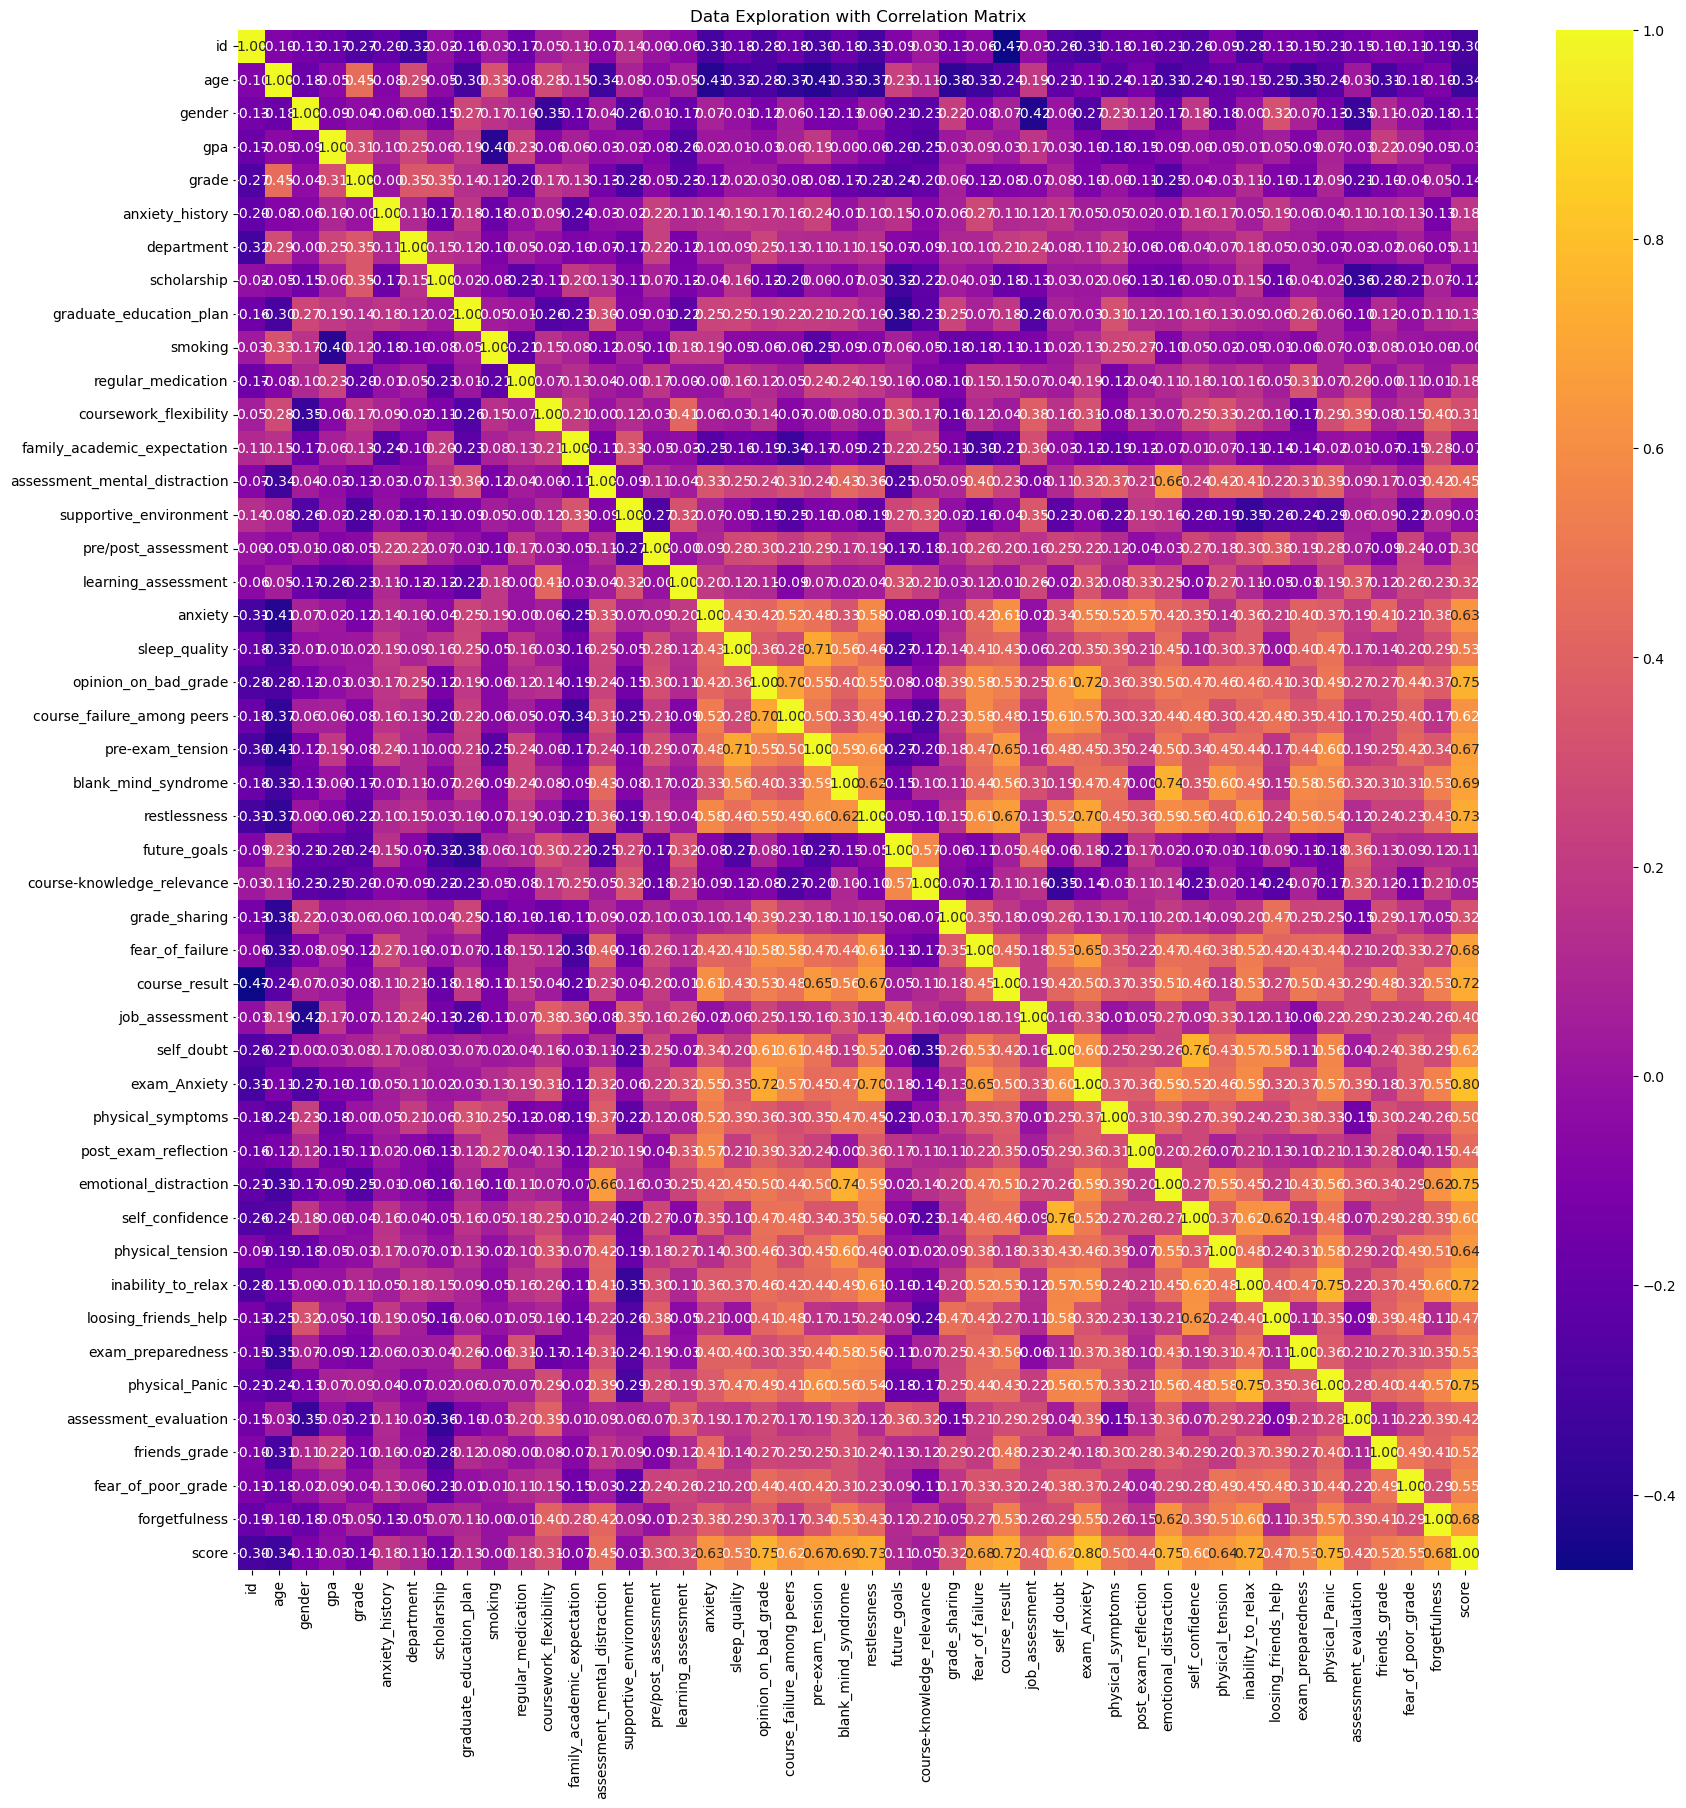

In [29]:
# Heatmap Correlation matrix

correlation_matrix = stressData.corr(numeric_only=True) # 
plt.figure(figsize=(20, 20))  # the size
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Data Exploration with Correlation Matrix')
plt.show()

#1 indicates a perfect positive correlation (as one variable increases, the other also increases).
#-1 indicates a perfect negative correlation (as one variable increases, the other decreases).
#0 indicates no correlation (the variables are independent of each other)


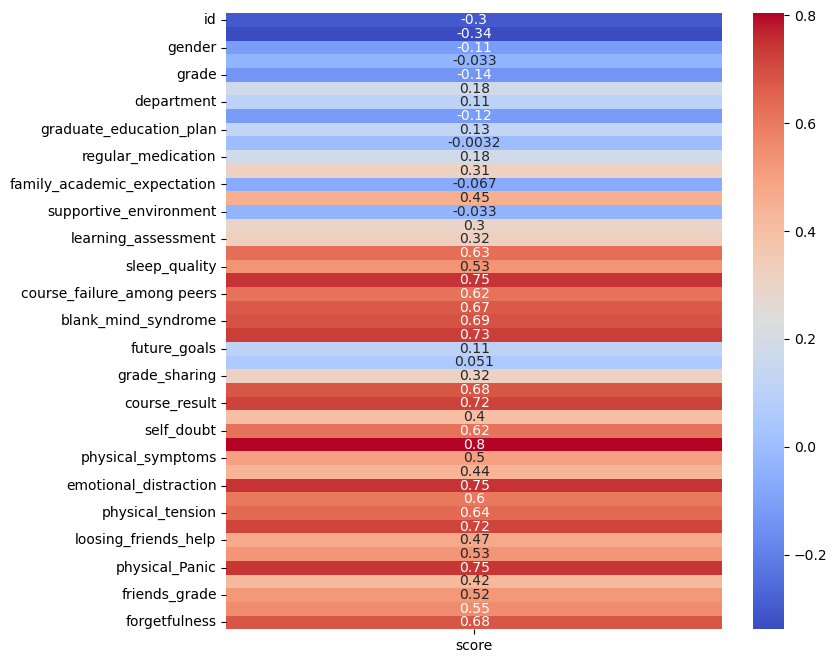

In [30]:
correlation_percentage = stressData.corr(numeric_only=True)
plt.figure(figsize = (8,8))
sns.heatmap(correlation_percentage.iloc[:-1,-1:], annot = True, cmap = sns.color_palette("coolwarm", as_cmap=True));

<Figure size 800x550 with 0 Axes>

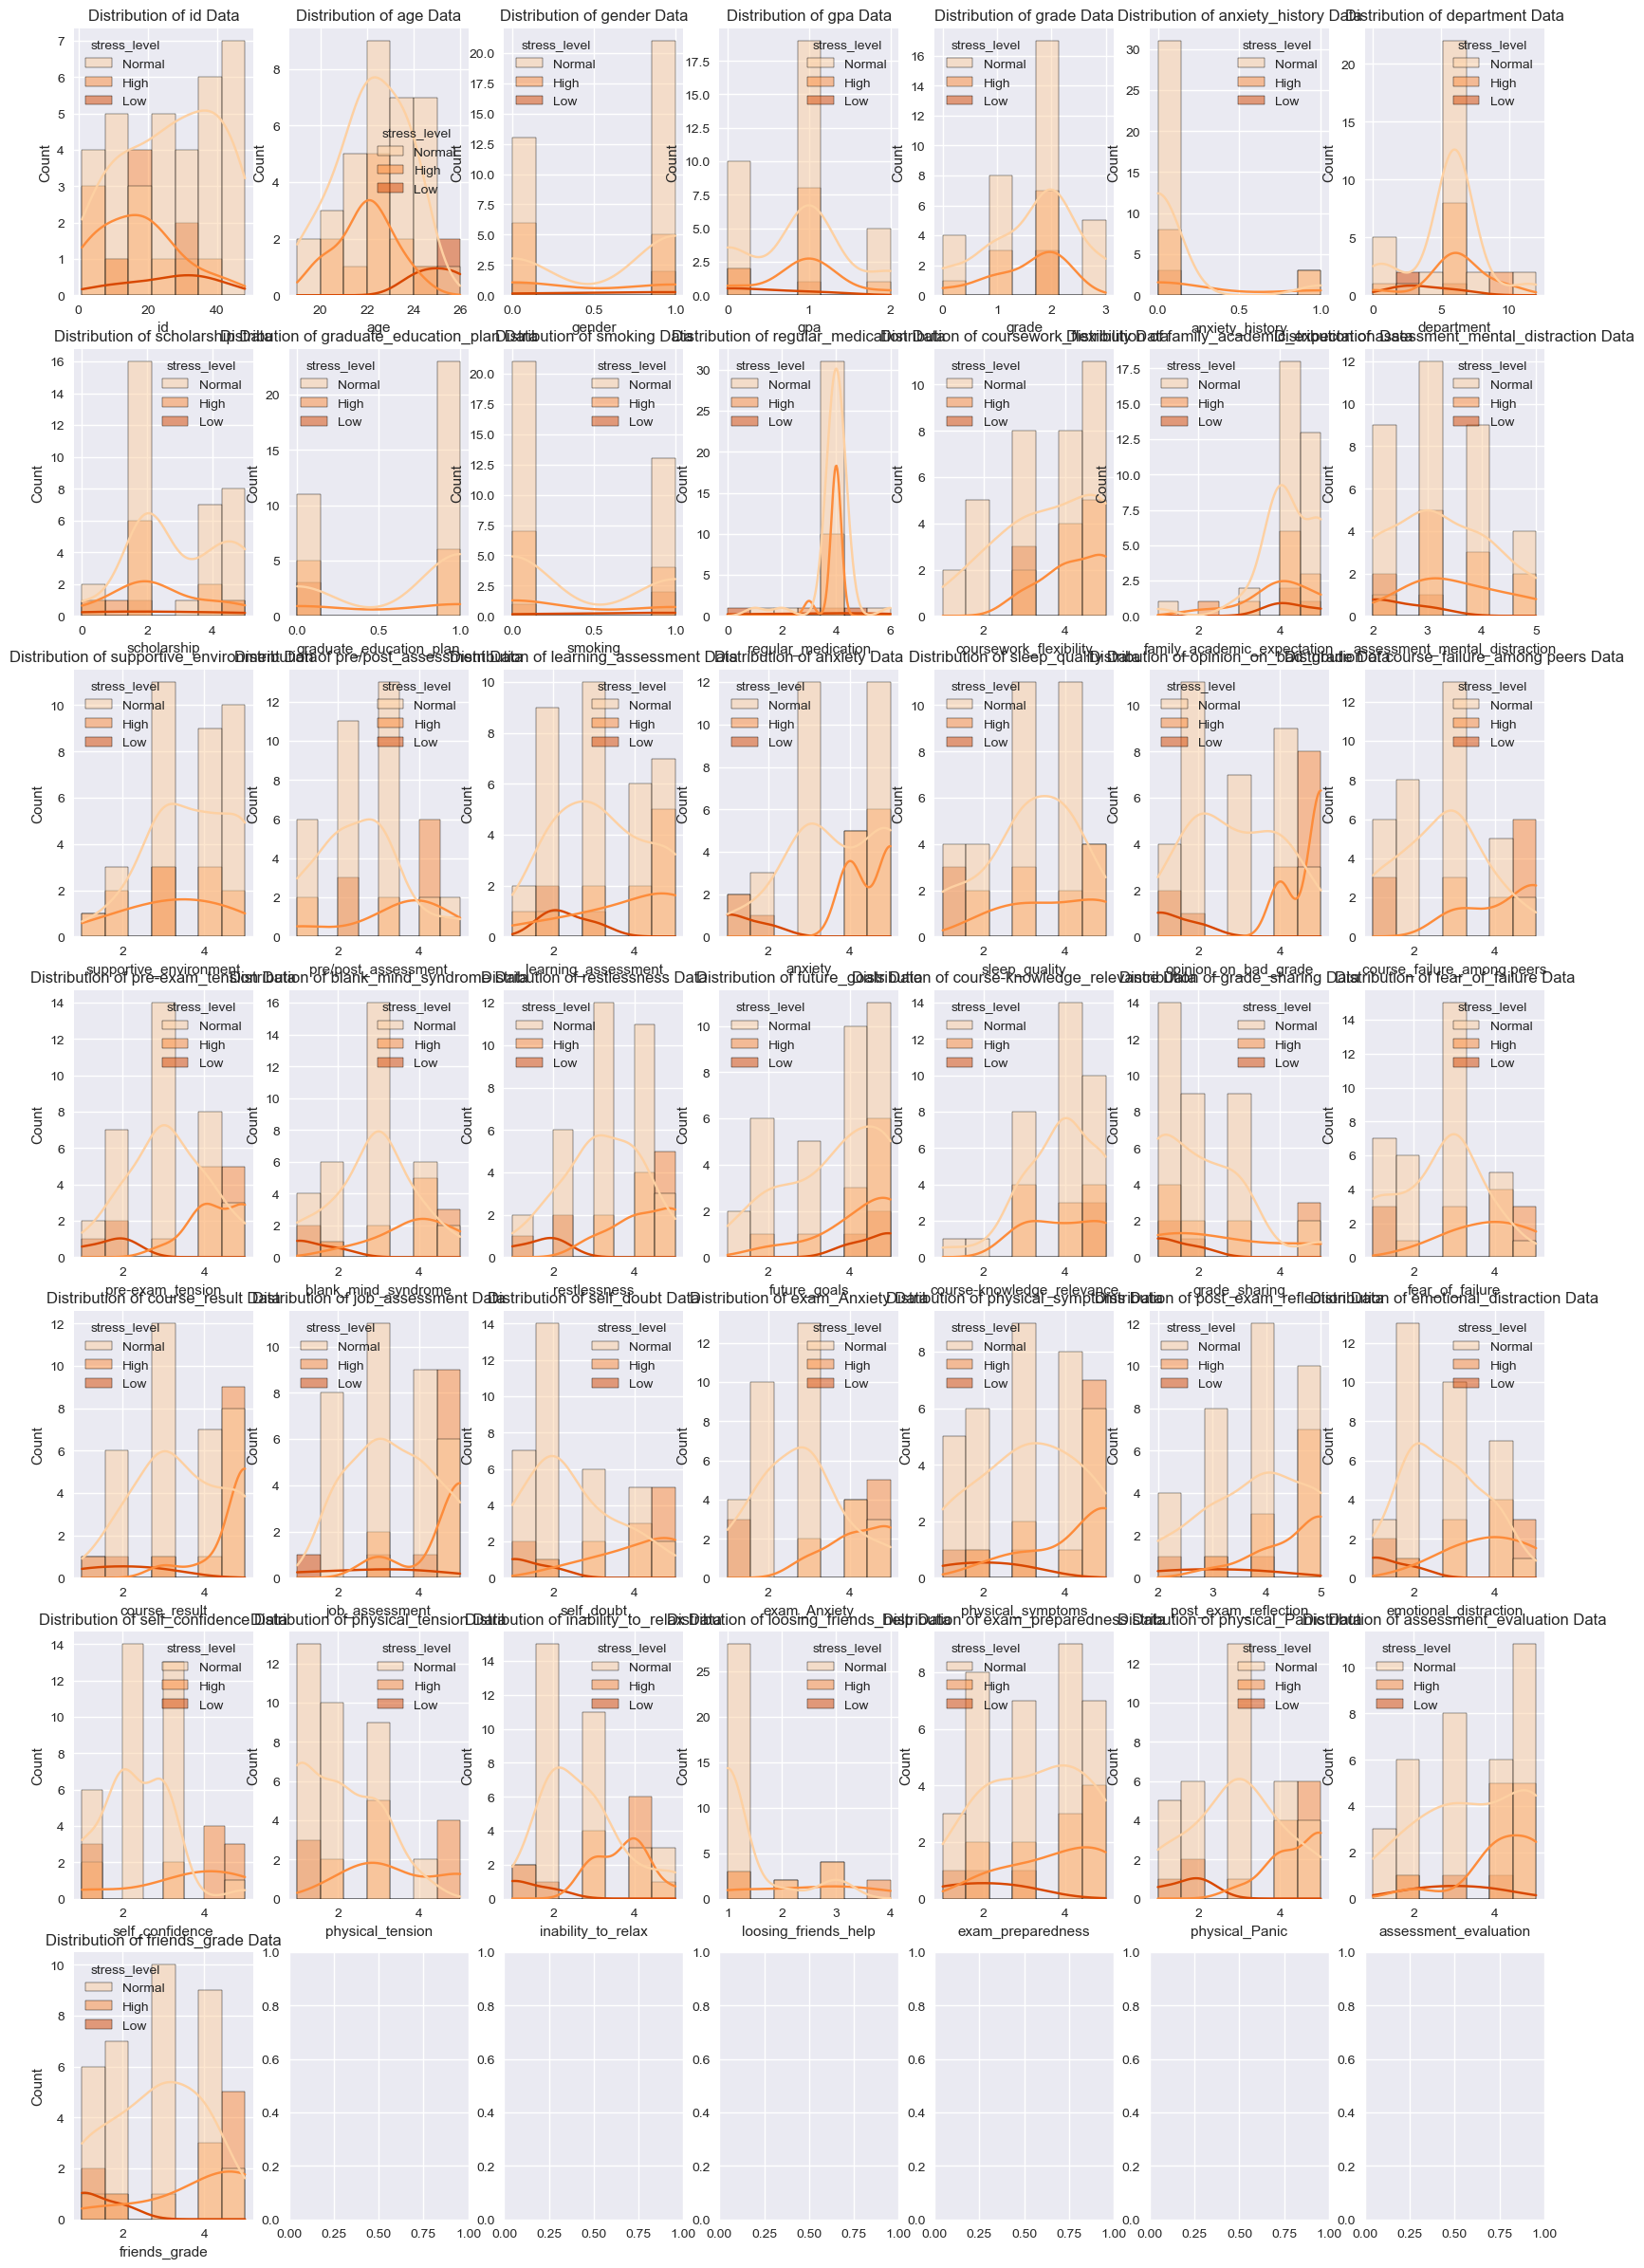

In [31]:
# To view the histogram of all the features, this gives an overall insight to the data and the distribution of stress levels over all the variables

plt.style.use("seaborn") # using seaborn library as the plot style
plt.subplots_adjust(hspace=0.4)
color = 'Oranges'

# Creating subplots with 7 rows and 7 columns, with figure size
fig, axs = plt.subplots(7, 7, figsize=(20,30))
i=1  # initializing the subplot index
for feature in stressData.columns:
# Selecting the subplot at position (i) within the grid
    if feature not in ["stress_level"] and i < 44:
        plt.subplot(7,7,i)
        plt.title(f"Distribution of {feature} Data")
        sns.histplot(data=stressData, x=feature, kde=True, palette=color, hue='stress_level')
        i+=1

Text(0, 0.5, 'Coursework flexibility')

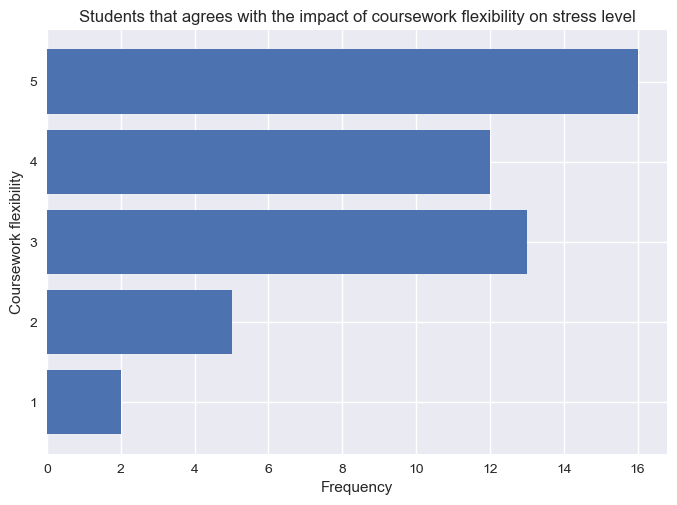

In [32]:
# Horizontal bar plot to visualize the variable coursework flexibility impact

Coursework_flexibility = 'coursework_flexibility'
value_counts = stressData[Coursework_flexibility].value_counts()
plt.barh(value_counts.index, value_counts.values)
plt.title('Students that agrees with the impact of coursework flexibility on stress level')
plt.xlabel('Frequency')
plt.ylabel('Coursework flexibility')


# output shows that more students admit that coursework flexibility impact their stress level


Text(0, 0.5, 'Physical Panic')

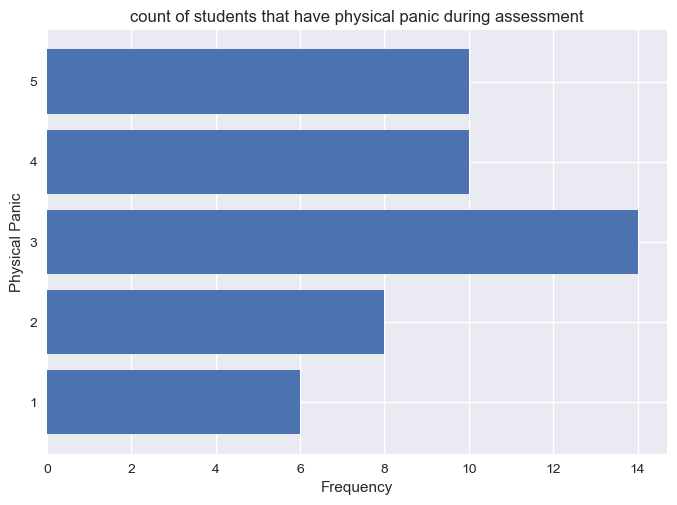

In [33]:
# Horizontal bar plot to visualize the variable coursework flexibility impact

physical_Panic = 'physical_Panic'
value_counts = stressData[physical_Panic].value_counts()
plt.barh(value_counts.index, value_counts.values)
plt.title('count of students that have physical panic during assessment')
plt.xlabel('Frequency')
plt.ylabel('Physical Panic')


# output shows that more students admit that coursework flexibility impact their stress level


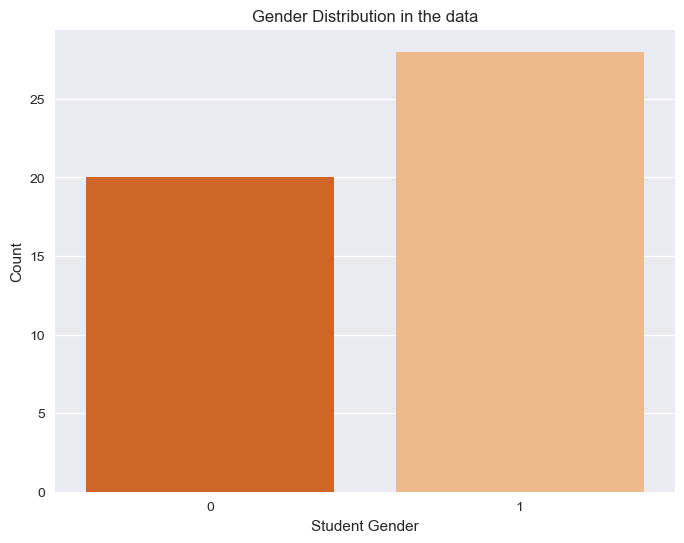

In [34]:
# Gender distribution in the data

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=stressData, palette='Oranges_r')
plt.title('Gender Distribution in the data')
plt.xlabel('Student Gender')
plt.ylabel('Count')
plt.show()

In [35]:
#To check if there is a gender that experience more stress

# Calculate the number of each gender
gender_counts = stressData['gender'].value_counts()
marker_color = ['red', 'orange']
# Calculate the percentage of each gender group
total_students = len(stressData)
percentages = (gender_counts / total_students) * 100

fig = px.pie(names=percentages.index.map({1: 'Male', 0: 'Female'}), 
             values=percentages, 
             title='Distribution of Stress Among Different Genders')
fig.update_traces(textinfo='percent+label', hoverinfo='label+percent', marker=dict(colors=marker_color))

fig.show()

# output shows that male gender do experince stress than female gender



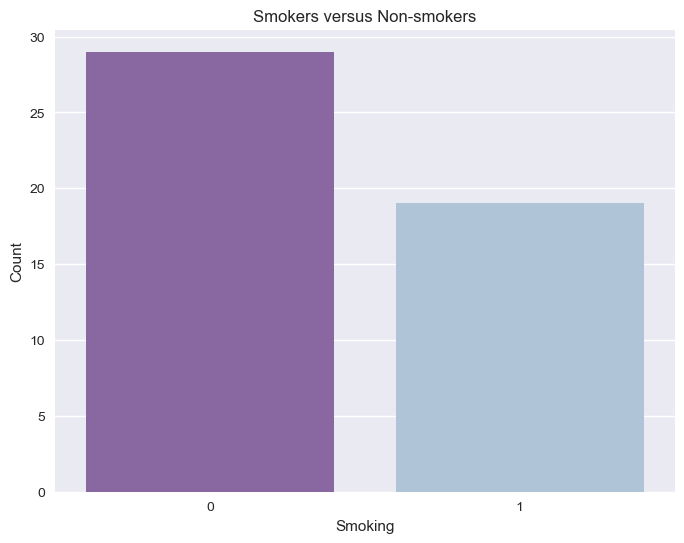

In [36]:
# students who smokes and those who do not.
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking', data=stressData, palette='BuPu_r')
plt.title('Smokers versus Non-smokers')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

In [37]:

# Count of each smoking group

smokers_counts = stressData['smoking'].value_counts()
marker_color = ['red', 'purple']

# percentage of each smoking group
total_students = len(stressData)
percentages = (smokers_counts / total_students) * 100

fig = px.pie(names=percentages.index.map({1: 'Smokers', 0: 'Non-Smokers'}), 
             values=percentages, 
             title='Distribution of Stress Levels Among Different Smokers and Non-Smokers')
fig.update_traces(textinfo='percent+label', hoverinfo='label+percent', marker=dict(colors=marker_color))

fig.show()


# output indicates that 1/3 of the students does not smoke

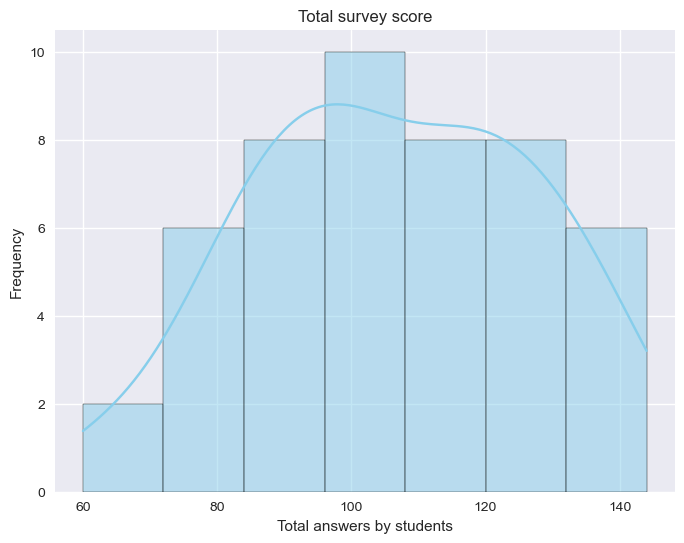

In [38]:
# Total survey score

plt.figure(figsize=(8, 6))
sns.histplot(stressData['score'], kde=True, color='skyblue')
plt.title('Total survey score')
plt.xlabel('Total answers by students')
plt.ylabel('Frequency')
plt.show()

# output shows that the highest score by student is 100 while the least score is 60

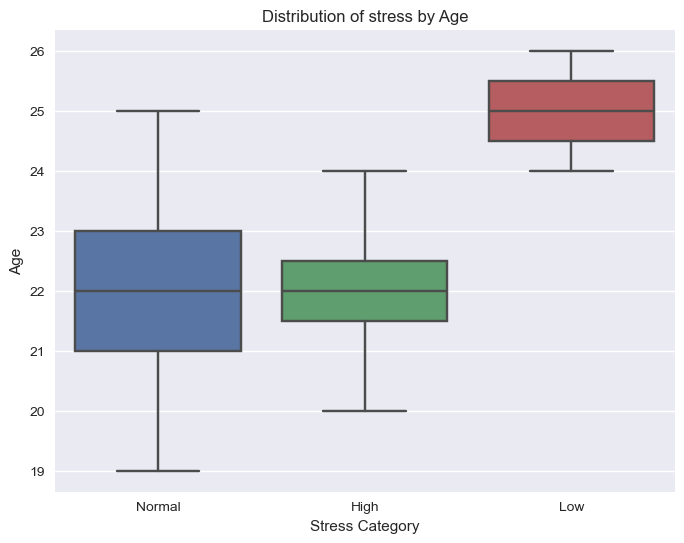

In [39]:
#Boxplot visualization to show the distribution of age across different stress levels



plt.figure(figsize=(8, 6))
sns.boxplot(x='stress_level', y='age', data=stressData)
plt.title('Distribution of stress by Age')
plt.xlabel('Stress Category')
plt.ylabel('Age')
plt.show()

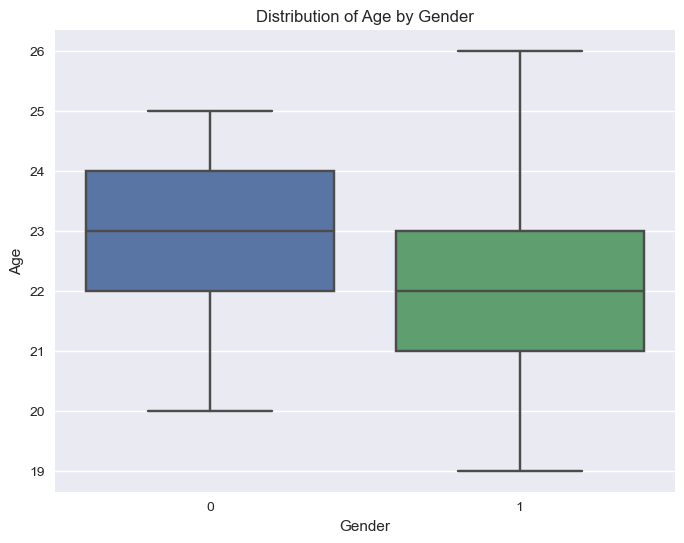

In [40]:
# Create a boxplot to visualize the distribution of age by gender

plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=stressData)# create the boxplot
plt.title('Distribution of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [41]:
# create the scatter plot using plotly to view the relationship between preexam tension and blackmind dyndrome using stress level as the color

fig = px.scatter(stressData, x="pre-exam_tension", y="blank_mind_syndrome", color="stress_level" , color_continuous_scale=['blue', 'red'])

fig.update_layout(title="Relationship between student having pre-exam tension and having blank mind syndrome", xaxis_title="Pre-exam tension", yaxis_title="Blank mind syndrome")

fig.show()

# output shows that student who often experince exam tension and black mind syndrome have high stress level 

In [42]:
# create the scatter plot using plotly to view the relationship between inability to relax and sleep quality using stress level as the color


fig = px.scatter(stressData, x="sleep_quality", y="inability_to_relax", color="stress_level" , color_continuous_scale=['blue', 'red'])

fig.update_layout(title="Relationship between student having inability to relax and their sleep quality", xaxis_title="Sleep quality", yaxis_title="Inability to relax")

fig.show()

In [43]:
# create the scatter plot using plotly to view the relationship between student anxiety history and exam anxiety using stress level as the color


fig = px.scatter(stressData, x="anxiety_history", y="exam_Anxiety", color="stress_level" , color_continuous_scale=['blue', 'red'])

fig.update_layout(title="Relationship between student age and having blank mind syndrome", xaxis_title="Anxiety history", yaxis_title="Exam Anxiety")

fig.show()

# output shows that student anxiety history does not directly impact their exam anxiety and student that often experince exam anxiety have high stress level

In [44]:
# create the scatter plot using plotly to view the relationship between preexam tension and blackmind dyndrome using stress level as the color

fig = px.scatter(stressData, x="coursework_flexibility", y="course_result", color="stress_level" , color_continuous_scale=['blue', 'red'])

fig.update_layout(title="Relationship between student coursework flexibility and their course result", xaxis_title="coursework flexibility", yaxis_title="course result")

fig.show()

## Descriptive statictics


In [45]:
# understanding more patterns and trends within the data

# to calculate and print the average age of student 
print("The average age is:", round(stressData.age.mean(), 2))

# to count and print the number of students who reported a history of anxiety
anxiety_count = len(stressData.loc[stressData.anxiety_history == 1])
print(anxiety_count, "students reported a history of anxiety.")

# to calculate the percentage of students reporting moderate or higher levels of depression
exam_anxiety_count = len(stressData.loc[stressData.exam_Anxiety >= 3])
percentage_exam_anxiety = round((exam_anxiety_count / len(stressData)) * 100, 2)
print(percentage_exam_anxiety, "% of students reported moderate or higher levels of depression.")

# to calculate the percentage of smokers compared to non-smokers
smokers_count = len(stressData.loc[stressData.smoking == 1])
non_smokers_count = len(stressData) - smokers_count
percentage_smokers = round((smokers_count / len(stressData)) * 100, 2)
print("There are", percentage_smokers, "% of smokers compared to non-smokers.")

# to calculate and print the percentage of students with poor sleep quality
poor_sleep_count = len(stressData.loc[stressData.sleep_quality == 'Poor'])
percentage_poor_sleep = round((poor_sleep_count / len(stressData)) * 100, 2)
print(percentage_poor_sleep, "% of students reported poor sleep quality.")

# to calculate and print the percentage of students experiencing blank mind syndrome
blank_mind_count = len(stressData.loc[stressData.blank_mind_syndrome == 1])
percentage_blank_mind = round((blank_mind_count / len(stressData)) * 100, 2)
print(percentage_blank_mind, "% of students experienced blank mind syndrome.")

# to calculate and print the percentage of students with fear of failure
fear_failure_count = len(stressData.loc[stressData.fear_of_poor_grade == 5])
percentage_fear_failure = round((fear_failure_count / len(stressData)) * 100, 2)
print(percentage_fear_failure, "% of students have a fear of failure.")

# to calculate and print the percentage of students who find it difficult to relax
inability_relax_count = len(stressData.loc[stressData.inability_to_relax == 5])
percentage_inability_relax = round((inability_relax_count / len(stressData)) * 100, 2)
print(percentage_inability_relax, "% of students find it difficult to relax.")



The average age is: 22.31
6 students reported a history of anxiety.
64.58 % of students reported moderate or higher levels of depression.
There are 39.58 % of smokers compared to non-smokers.
0.0 % of students reported poor sleep quality.
12.5 % of students experienced blank mind syndrome.
6.25 % of students have a fear of failure.
8.33 % of students find it difficult to relax.


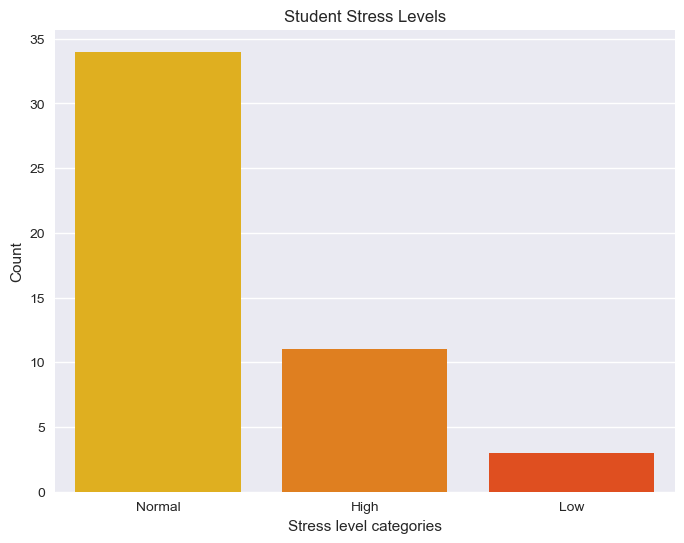

In [46]:
# To show students stress levels

plt.figure(figsize=(8, 6))
sns.countplot(x='stress_level', data=stressData, palette='autumn_r')
plt.title('Student Stress Levels')
plt.xlabel('Stress level categories')
plt.ylabel('Count')
plt.show()

In [47]:
# The class is really imbalanced to investigate more on number of samples in each classes

# Extract the target variable from the dataset
y = stressData['stress_level']

print("Class distribution of each classes:")
print(Counter(y))



Class distribution of each classes:
Counter({'Normal': 34, 'High': 11, 'Low': 3})


In [48]:
# performing oversampling to bring the classes closer to each other in order to improve models performance
class_counts = Counter(y)
majority_class = max(class_counts, key=class_counts.get)
minority_classes = [cls for cls, count in class_counts.items() if cls != majority_class]

# Initialize the oversampler for each minority class
oversampler = RandomOverSampler(sampling_strategy={cls: class_counts[majority_class] for cls in minority_classes})

# Resample the minority classes
X_resampled, y_resampled = oversampler.fit_resample(stressData.drop(columns=['stress_level']), y)

# Combine the oversampled instances with the original data
resampled_df = pd.DataFrame(X_resampled, columns=stressData.drop(columns=['stress_level']).columns)
resampled_df['stress_level'] = y_resampled
# Concatenate the original DataFrame and the oversampled DataFrame
stressData = pd.concat([stressData, resampled_df], ignore_index=True)

# Check the class distribution after oversampling
print("\nClass distribution after oversampling:")
print(resampled_df['stress_level'].value_counts())



Class distribution after oversampling:
Normal    34
High      34
Low       34
Name: stress_level, dtype: int64


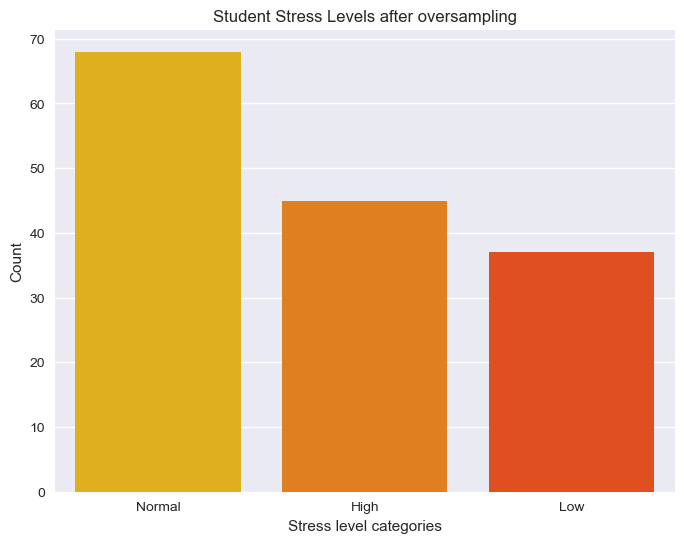

In [49]:
# Stress level classses after oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x='stress_level', data=stressData, palette='autumn_r')
plt.title('Student Stress Levels after oversampling')
plt.xlabel('Stress level categories')
plt.ylabel('Count')
plt.show()

# Having a balanced dataset is important as it improves analysis

## Feature Extraction using Principal component analysis (PCA) for dimensionality reduction

In [50]:

# To select only the numeric features for PCA thereby removing the target variable

np.random.seed(42)
numeric_columns = stressData.select_dtypes(include=['int64', 'float64']).columns
X = stressData[numeric_columns]  # Features
y = stressData['stress_level']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA
pca = PCA()  

# Fit PCA to the scaled data
X_pca = pca.fit_transform(X_scaled)


# Convert the result to a DataFrame
pca_df = pd.DataFrame(data=X_pca) 
pca_df['stress_level'] = y  # Adding back the target variable for analysis


print(pca_df)


            0         1         2         3         4         5         6  \
0    1.843256 -0.121728 -1.763160 -0.374077  1.218123  0.583155  0.015439   
1   -4.596676  0.274302 -0.836038  0.849292  0.023073  0.075541 -0.485530   
2   -1.527040  0.452718  1.085439  0.458703  0.530866  1.217648 -0.770806   
3   -0.777928 -2.493768 -0.550552  0.117131  1.157039 -0.788198 -1.722745   
4   -5.997327 -2.158370  0.874008  0.651353  2.103662 -0.360587 -0.316770   
..        ...       ...       ...       ...       ...       ...       ...   
145  6.816679 -0.285922  2.628179 -0.537073 -2.539685 -1.194886 -0.041127   
146  6.816679 -0.285922  2.628179 -0.537073 -2.539685 -1.194886 -0.041127   
147  4.599457  0.810460 -2.099515  0.217783  0.372136  2.510209  1.081835   
148  6.816679 -0.285922  2.628179 -0.537073 -2.539685 -1.194886 -0.041127   
149  6.020121 -0.204572 -0.958108  1.286371  1.643840 -1.480879 -0.181476   

            7         8         9  ...        37        38        39  \
0  

In [51]:
pca_df.describe() # to show the pca statictics

0             1             2             3             4   \
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02   
mean   9.473903e-17 -4.736952e-17 -5.921189e-18 -1.184238e-17 -8.289665e-17   
std    4.178449e+00  1.891090e+00  1.681683e+00  1.569414e+00  1.502271e+00   
min   -6.098968e+00 -3.602346e+00 -3.488664e+00 -3.814749e+00 -2.918268e+00   
25%   -4.029115e+00 -9.184984e-01 -9.581084e-01 -9.430675e-01 -1.141598e+00   
50%   -5.533462e-01 -2.045720e-01 -2.370388e-01  1.297704e-01  3.442496e-01   
75%    4.215224e+00  8.104603e-01  1.246238e+00  8.492923e-01  1.136687e+00   
max    6.816679e+00  3.955843e+00  3.749691e+00  3.911649e+00  3.407294e+00   

                 5             6           7             8             9   \
count  1.500000e+02  1.500000e+02  150.000000  1.500000e+02  1.500000e+02   
mean  -2.368476e-16 -1.657933e-16    0.000000 -1.184238e-17 -5.921189e-17   
std    1.480454e+00  1.285129e+00    1.244492  1.118632e+00  1.079019e+00   
min   -2.489743e+00 -3.410815e+00   -2.568471 -2.676736e+00 -2.083544e+00   
25%   -1.194886e+00 -8.064099e-01   -0.887182 -6.039205e-01 -4.199058e-01   
50%   -2.421940e-01 -1.814756e-01   -0.246056 -1.310764e-01 -7.228394e-02   
75%    1.033575e+00  7.418265e-01    0.585630  3.952145e-01  5.897086e-01   
max    3.128220e+00  3.442113e+00    4.628621  4.950840e+00  3.557556e+00   

       ...            36            37            38            39  \
count  ...  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02   
mean   ...  8.326673e-18 -2.146431e-17  3.774758e-17 -2.918961e-17   
std    ...  1.916328e-01  1.511187e-01  1.301811e-01  1.087978e-01   
min    ... -3.806898e-01 -3.275574e-01 -2.994726e-01 -2.515610e-01   
25%    ... -1.221575e-01 -1.188705e-01 -4.756372e-02 -5.663083e-02   
50%    ...  1.379583e-02  3.286981e-03  3.741018e-03 -9.224657e-03   
75%    ...  1.083490e-01  9.476694e-02  3.460151e-02  4.391594e-02   
max    ...  8.345856e-01  3.903584e-01  4.806385e-01  2.889214e-01   

                 40            41            42            43            44  \
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02   
mean  -6.365279e-17  1.480297e-17 -9.646219e-17 -1.276756e-17  1.989150e-17   
std    6.876838e-02  5.967267e-02  4.603626e-02  3.902033e-02  2.434871e-02   
min   -1.899426e-01 -1.550209e-01 -1.530194e-01 -8.845274e-02 -6.558960e-02   
25%   -3.547401e-02 -2.898729e-02 -1.843794e-02 -1.731287e-02 -1.193049e-02   
50%   -3.259231e-03 -6.922774e-03 -1.670910e-03 -3.215062e-03  1.952534e-03   
75%    2.576125e-02  2.063543e-02  1.912150e-02  6.716177e-03  6.848978e-03   
max    2.058465e-01  1.887210e-01  1.557732e-01  2.185298e-01  7.031151e-02   

                 45  
count  1.500000e+02  
mean  -2.997617e-17  
std    3.344325e-16  
min   -1.078932e-15  
25%   -9.262728e-17  
50%   -2.850282e-17  
75%    1.970693e-17  
max    1.514917e-15  

[8 rows x 46 columns]

In [52]:
# To get the amount of variance explained by each principal component which is the total vaariance captured by each principal component(PC)

# Fit PCA to the scaled data
np.random.seed(42)
pca.fit(X_scaled)

variance = pca.explained_variance_ratio_

# Cumulative variance explained
cum_variance= np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# Print the variance explained by each principal component
print("The variance explained by each principal component:")
for i, explained_variance in enumerate(variance):
    print(f"PC{i+1}: {explained_variance:.4f}")

# Print the cumulative variance explained
print("\nCumulative variance :")
for i, cumulative_variance in enumerate(cum_variance):
    print(f"PC{i+1}: {cumulative_variance:.4f}")
#print(cum_variance)  



The variance explained by each principal component:
PC1: 0.3770
PC2: 0.0772
PC3: 0.0611
PC4: 0.0532
PC5: 0.0487
PC6: 0.0473
PC7: 0.0357
PC8: 0.0334
PC9: 0.0270
PC10: 0.0251
PC11: 0.0232
PC12: 0.0196
PC13: 0.0175
PC14: 0.0156
PC15: 0.0145
PC16: 0.0124
PC17: 0.0123
PC18: 0.0115
PC19: 0.0102
PC20: 0.0096
PC21: 0.0084
PC22: 0.0073
PC23: 0.0066
PC24: 0.0062
PC25: 0.0056
PC26: 0.0050
PC27: 0.0048
PC28: 0.0037
PC29: 0.0033
PC30: 0.0029
PC31: 0.0027
PC32: 0.0023
PC33: 0.0023
PC34: 0.0017
PC35: 0.0015
PC36: 0.0012
PC37: 0.0008
PC38: 0.0005
PC39: 0.0004
PC40: 0.0003
PC41: 0.0001
PC42: 0.0001
PC43: 0.0000
PC44: 0.0000
PC45: 0.0000
PC46: 0.0000

Cumulative variance :
PC1: 37.7000
PC2: 45.4200
PC3: 51.5300
PC4: 56.8500
PC5: 61.7200
PC6: 66.4500
PC7: 70.0200
PC8: 73.3600
PC9: 76.0600
PC10: 78.5700
PC11: 80.8900
PC12: 82.8500
PC13: 84.6000
PC14: 86.1600
PC15: 87.6100
PC16: 88.8500
PC17: 90.0800
PC18: 91.2300
PC19: 92.2500
PC20: 93.2100
PC21: 94.0500
PC22: 94.7800
PC23: 95.4400
PC24: 96.0600
PC25: 96.

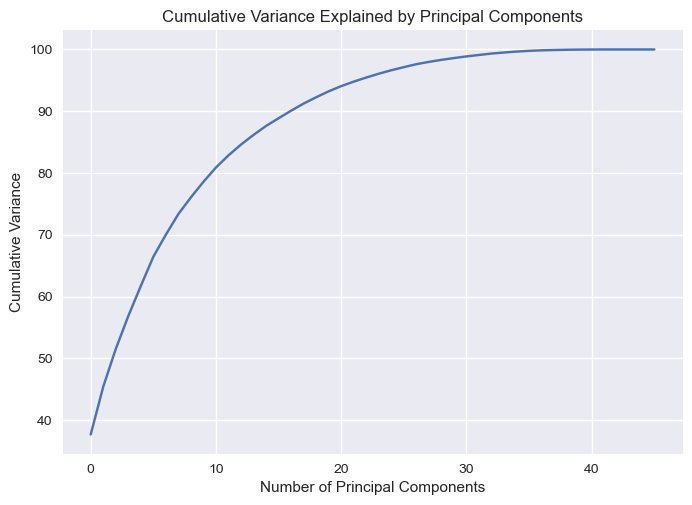

In [53]:
#To Plot the cumulative variance 
plt.plot(cum_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()


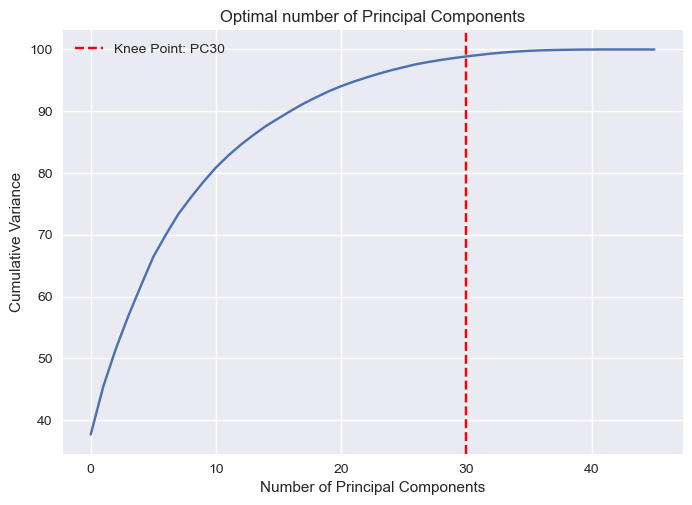

Number of principal components at the knee point is : 30


In [54]:
# Using knee point to find the optimal number of Principal components
np.random.seed(42)

Knee_point = np.diff(np.diff(cum_variance))

# Find the index of the maximum value in the second derivative array
knee_point_index = np.argmax(Knee_point)

# Plot the cumulative variance explained with the knee point
plt.plot(cum_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.title('Optimal number of Principal Components')
plt.axvline(x=knee_point_index, color='r', linestyle='--', label=f'Knee Point: PC{knee_point_index}')
plt.legend()
plt.show()

print(f"Number of principal components at the knee point is : {knee_point_index}")


# output shows that the knee point is 39 this is the point at which the optimal number of the pc retain important features 




In [55]:
# To create a new dataframe based on the selected number of principal components

PcaSelectedData = PCA(n_components=knee_point_index)
PcaSelecteddData = PcaSelectedData.fit_transform(X_scaled)

# Create a DataFrame with the transformed features
PCAstressData = pd.DataFrame(data=PcaSelecteddData, columns=X.columns[:knee_point_index])
PCAstressData['stress_level'] = y  # Adding back the target variable for analysis


print(PCAstressData)


# we have a total of 39 columns that are most relevant, plus the target variable making it 40 columns in toatl  

           id       age    gender       gpa     grade  anxiety_history  \
0    1.843256 -0.121728 -1.763160 -0.374077  1.218123         0.583155   
1   -4.596676  0.274302 -0.836038  0.849292  0.023073         0.075541   
2   -1.527040  0.452718  1.085439  0.458703  0.530866         1.217648   
3   -0.777928 -2.493768 -0.550552  0.117131  1.157039        -0.788198   
4   -5.997327 -2.158370  0.874008  0.651353  2.103662        -0.360587   
..        ...       ...       ...       ...       ...              ...   
145  6.816679 -0.285922  2.628179 -0.537073 -2.539685        -1.194886   
146  6.816679 -0.285922  2.628179 -0.537073 -2.539685        -1.194886   
147  4.599457  0.810460 -2.099515  0.217783  0.372136         2.510209   
148  6.816679 -0.285922  2.628179 -0.537073 -2.539685        -1.194886   
149  6.020121 -0.204572 -0.958108  1.286371  1.643840        -1.480879   

     department  scholarship  graduate_education_plan   smoking  ...  \
0      0.015439     1.072951           

In [56]:
## Before the next step we are encoding the target variable using the same label encoder as before to ensure consistency 
#and adding it to the pca transformed data for further analysis

# Initialize the LabelEncoder to encode the target variable
label_encoder = LabelEncoder()

# Label encoding to the target variable
PCAstressData['stress_level'] = label_encoder.fit_transform(PCAstressData['stress_level'])

print(PCAstressData)

           id       age    gender       gpa     grade  anxiety_history  \
0    1.843256 -0.121728 -1.763160 -0.374077  1.218123         0.583155   
1   -4.596676  0.274302 -0.836038  0.849292  0.023073         0.075541   
2   -1.527040  0.452718  1.085439  0.458703  0.530866         1.217648   
3   -0.777928 -2.493768 -0.550552  0.117131  1.157039        -0.788198   
4   -5.997327 -2.158370  0.874008  0.651353  2.103662        -0.360587   
..        ...       ...       ...       ...       ...              ...   
145  6.816679 -0.285922  2.628179 -0.537073 -2.539685        -1.194886   
146  6.816679 -0.285922  2.628179 -0.537073 -2.539685        -1.194886   
147  4.599457  0.810460 -2.099515  0.217783  0.372136         2.510209   
148  6.816679 -0.285922  2.628179 -0.537073 -2.539685        -1.194886   
149  6.020121 -0.204572 -0.958108  1.286371  1.643840        -1.480879   

     department  scholarship  graduate_education_plan   smoking  ...  \
0      0.015439     1.072951           

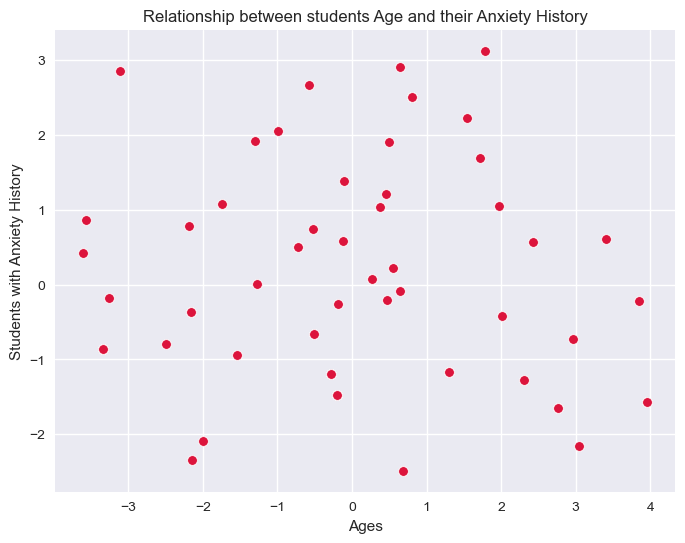

In [57]:
# Scatter plot to explore relationship between the variables after performing dimension reduction
 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='anxiety_history', data=PCAstressData, color='crimson')
plt.title('Relationship between students Age and their Anxiety History')
plt.xlabel('Ages')
plt.ylabel('Students with Anxiety History')
plt.show()

# output shows a weak correlation between these two variabkles which may mean that each student anxiety history has nothing to do with thier ages

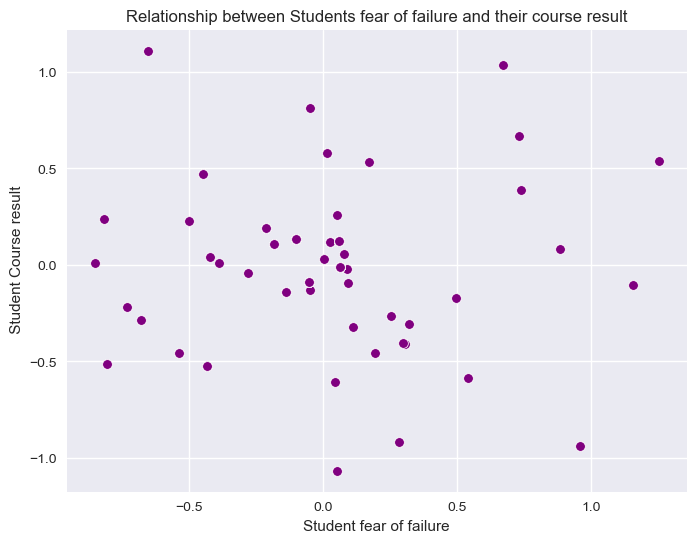

In [63]:
# relationship between the students fear of failure and their result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='fear_of_failure', y='course_result', data=PCAstressData, color='Purple')
plt.title('Relationship between Students fear of failure and their course result')
plt.xlabel('Student fear of failure')
plt.ylabel(' Student Course result')
plt.show()

# output indicates a weak positive correlation between students fear of failure and course result 

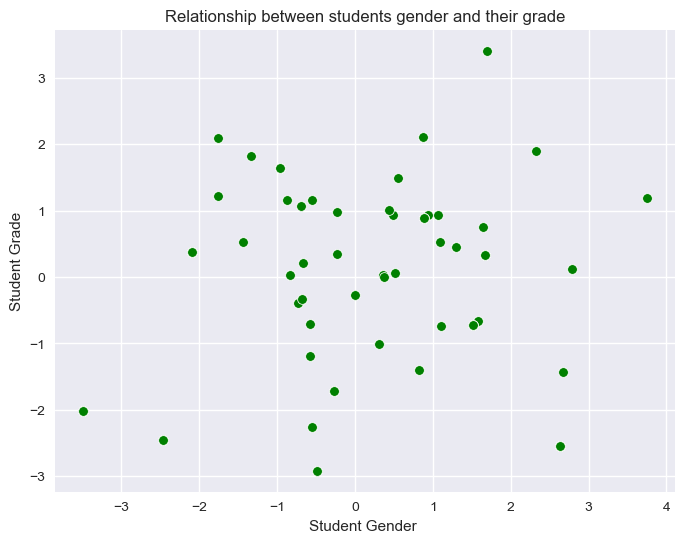

In [59]:
# Scatter plot to explore relationship between the gender and grade, if there are genders with better grades

plt.figure(figsize=(8, 6))
sns.scatterplot(x='gender', y='grade', data=PCAstressData, color='Green')
plt.title('Relationship between students gender and their grade')
plt.xlabel('Student Gender ')
plt.ylabel('Student Grade')
plt.show()


# output shows strong correlation between these two variabkes and at the same time a postive corrrelation

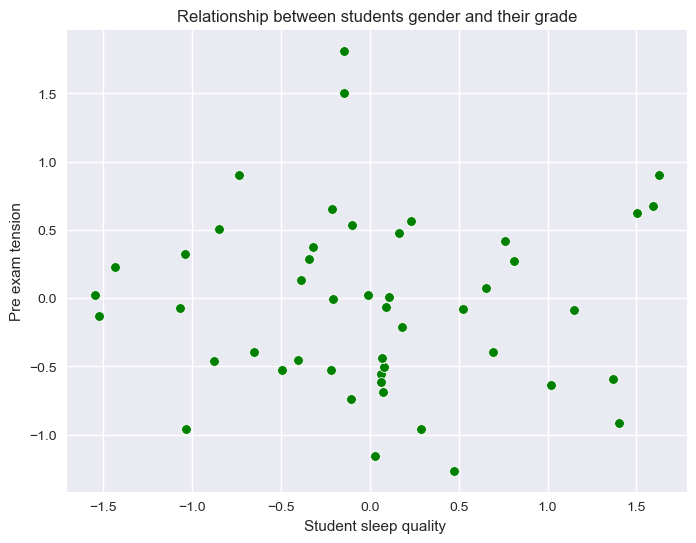

In [60]:

## Scatter plot visualization to explore relationship between student sleep quality before exam or assessment

plt.figure(figsize=(8, 6))
sns.scatterplot(x='sleep_quality', y='pre-exam_tension', data=PCAstressData, color='Green')
plt.title('Relationship between students gender and their grade')
plt.xlabel('Student sleep quality ')
plt.ylabel('Pre exam tension')
plt.show()
# output indicates sleep quality has a positive correlation with Pre-exam tension, this may indicate that during exams students tends to have lower sleep quality 

## Feature selection using Analysis of variance (ANOVA) statistical test
while PCA is effective for dimensionality reduction and capturing variance in the data, performing feature selection with the anova test allows better interpretability, noise reduction, improved model performance, and computational efficiency.

In [64]:
# To extract features and target variable from PCA transformed data

X_pca = PCAstressData.drop(columns=['stress_level'])  # other features
y_pca = PCAstressData['stress_level']  # Target variable

# Perform ANOVA test to get feature scores
Anova_selector = SelectKBest(score_func=f_classif, k='all')  # To select all features
X_scores = Anova_selector.fit_transform(X_pca, y_pca)

# Get the ANOVA scores and p-values
F_scores = Anova_selector.scores_
p_values = Anova_selector.pvalues_

# Create a DataFrame to store ANOVA results
anova_results = pd.DataFrame({
    'Features': X_pca.columns,
    'F-score': F_scores,
    'P-value': p_values
})

print("ANOVA Feature Scores:")
print(anova_results)


ANOVA Feature Scores:
                         Features     F-score       P-value
0                              id  486.235674  1.568086e-65
1                             age    0.548935  5.787439e-01
2                          gender    3.305155  3.943914e-02
3                             gpa    9.946928  8.880928e-05
4                           grade    5.887430  3.470294e-03
5                 anxiety_history    6.379257  2.204039e-03
6                      department    0.831419  4.374681e-01
7                     scholarship    4.857587  9.060705e-03
8         graduate_education_plan    7.965151  5.196216e-04
9                         smoking    3.387362  3.645692e-02
10             regular_medication    2.099534  1.261723e-01
11         coursework_flexibility    0.557634  5.737683e-01
12    family_academic_expectation    1.779149  1.723968e-01
13  assessment_mental_distraction    3.551247  3.117551e-02
14         supportive_environment    0.470379  6.257025e-01
15            pre/

In [65]:

#The p-value indicates the statistical significance of the F-score, lower p-value suggests that the relationship between the feature and the target variable is more significant.

# Therefore to sort the features based on pvalue scores in Ascending order

sorted_results = anova_results.sort_values(by='P-value', ascending=True)

Pvalue_selected_features = sorted_results

print("P-values in Ascending order:")
print(Pvalue_selected_features)

P-values in Ascending order:
                         Features     F-score       P-value
0                              id  486.235674  1.568086e-65
3                             gpa    9.946928  8.880928e-05
8         graduate_education_plan    7.965151  5.196216e-04
5                 anxiety_history    6.379257  2.204039e-03
4                           grade    5.887430  3.470294e-03
7                     scholarship    4.857587  9.060705e-03
16            learning_assessment    4.764433  9.888552e-03
13  assessment_mental_distraction    3.551247  3.117551e-02
9                         smoking    3.387362  3.645692e-02
2                          gender    3.305155  3.943914e-02
27                fear_of_failure    2.822943  6.265692e-02
28                  course_result    2.551411  8.142069e-02
17                        anxiety    2.172924  1.174875e-01
10             regular_medication    2.099534  1.261723e-01
12    family_academic_expectation    1.779149  1.723968e-01
25     cour

In [68]:
# To get the features with the most significant value using 0.5 as the threshold on the pvalue

# Set a random seed for reproducibility
np.random.seed(42)

# Defining the significance level of the pvalue
Alpha = 0.5

# Filtering the ANOVA results based on P value significance level
significant_features = anova_results[anova_results['P-value'] < Alpha]

print("Significant Features (alpha = 0.5):")
print(significant_features)

# output suggested we have 20 features that have more significance to our analysis

Significant Features (alpha = 0.5):
                         Features     F-score       P-value
0                              id  486.235674  1.568086e-65
2                          gender    3.305155  3.943914e-02
3                             gpa    9.946928  8.880928e-05
4                           grade    5.887430  3.470294e-03
5                 anxiety_history    6.379257  2.204039e-03
6                      department    0.831419  4.374681e-01
7                     scholarship    4.857587  9.060705e-03
8         graduate_education_plan    7.965151  5.196216e-04
9                         smoking    3.387362  3.645692e-02
10             regular_medication    2.099534  1.261723e-01
12    family_academic_expectation    1.779149  1.723968e-01
13  assessment_mental_distraction    3.551247  3.117551e-02
16            learning_assessment    4.764433  9.888552e-03
17                        anxiety    2.172924  1.174875e-01
19           opinion_on_bad_grade    0.956991  3.864263e-01
21  

In [69]:
# List of significant features from the feature selection 

significant_features = [
    'id', 'age', 'gender', 'gpa', 'grade', 'anxiety_history', 'department',
    'scholarship', 'smoking', 'regular_medication', 'coursework_flexibility',
    'family_academic_expectation', 'anxiety', 'sleep_quality', 'pre-exam_tension',
    'restlessness', 'future_goals', 'fear_of_failure', 'course_result', 'course_result'
]

# Creating a new DataFrame with only the significant features from pcastressdata

modelling_data = PCAstressData[significant_features].copy()

# Adding back the target variable column to the modelling_data DataFrame
modelling_data['stress_level'] = PCAstressData['stress_level']

# Display the first few rows of the new DataFrame
print("DataFrame with the significant features that will be used for the continous analysis are:")


print(modelling_data.head())



DataFrame with the significant features that will be used for the continous analysis are:
         id       age    gender       gpa     grade  anxiety_history  \
0  1.843256 -0.121728 -1.763160 -0.374077  1.218123         0.583155   
1 -4.596676  0.274302 -0.836038  0.849292  0.023073         0.075541   
2 -1.527040  0.452718  1.085439  0.458703  0.530866         1.217648   
3 -0.777928 -2.493768 -0.550552  0.117131  1.157039        -0.788198   
4 -5.997327 -2.158370  0.874008  0.651353  2.103662        -0.360587   

   department  scholarship   smoking  regular_medication  ...  \
0    0.015439     1.072951 -0.383902            0.797365  ...   
1   -0.485530     4.628621  3.557556            0.175245  ...   
2   -0.770806     2.509061 -0.049364            0.633481  ...   
3   -1.722745     0.655524  0.242040           -0.539730  ...   
4   -0.316770    -1.133493  0.554181            0.946666  ...   

   family_academic_expectation   anxiety  sleep_quality  pre-exam_tension  \
0        

In [70]:
modelling_data  # now we have 20 columns that are impotant to the target variable plus the target variable 21 columns all together for the continous analysis

# new dataframe for the modelling

id       age    gender       gpa     grade  anxiety_history  \
0    1.843256 -0.121728 -1.763160 -0.374077  1.218123         0.583155   
1   -4.596676  0.274302 -0.836038  0.849292  0.023073         0.075541   
2   -1.527040  0.452718  1.085439  0.458703  0.530866         1.217648   
3   -0.777928 -2.493768 -0.550552  0.117131  1.157039        -0.788198   
4   -5.997327 -2.158370  0.874008  0.651353  2.103662        -0.360587   
..        ...       ...       ...       ...       ...              ...   
145  6.816679 -0.285922  2.628179 -0.537073 -2.539685        -1.194886   
146  6.816679 -0.285922  2.628179 -0.537073 -2.539685        -1.194886   
147  4.599457  0.810460 -2.099515  0.217783  0.372136         2.510209   
148  6.816679 -0.285922  2.628179 -0.537073 -2.539685        -1.194886   
149  6.020121 -0.204572 -0.958108  1.286371  1.643840        -1.480879   

     department  scholarship   smoking  regular_medication  ...  \
0      0.015439     1.072951 -0.383902            0.797365  ...   
1     -0.485530     4.628621  3.557556            0.175245  ...   
2     -0.770806     2.509061 -0.049364            0.633481  ...   
3     -1.722745     0.655524  0.242040           -0.539730  ...   
4     -0.316770    -1.133493  0.554181            0.946666  ...   
..          ...          ...       ...                 ...  ...   
145   -0.041127    -0.012482  1.039270            0.741557  ...   
146   -0.041127    -0.012482  1.039270            0.741557  ...   
147    1.081835    -1.119405  0.526165            0.415805  ...   
148   -0.041127    -0.012482  1.039270            0.741557  ...   
149   -0.181476    -0.246056 -0.419906           -0.116968  ...   

     family_academic_expectation   anxiety  sleep_quality  pre-exam_tension  \
0                       0.087177  0.696592      -1.546175          0.021579   
1                      -0.107749  0.352557       0.230485          0.564046   
2                       1.759158  0.306297       0.526561         -0.075950   
3                       0.321649 -0.570800      -1.032074         -0.957528   
4                       0.232374 -0.906105       1.504541          0.626688   
..                           ...       ...            ...               ...   
145                     0.193639 -0.195321       0.090396         -0.063665   
146                     0.193639 -0.195321       0.090396         -0.063665   
147                     0.884017 -0.247434       0.066654         -0.435113   
148                     0.193639 -0.195321       0.090396         -0.063665   
149                    -0.279879 -0.052889      -0.101858          0.532369   

     restlessness  future_goals  fear_of_failure  course_result  \
0        0.423213     -0.856443        -0.679919      -0.284299   
1       -0.840271     -0.102233        -0.538348      -0.457250   
2       -0.946002     -0.463732         0.283313      -0.919522   
3       -0.285131     -0.763887         1.156816      -0.106712   
4        0.182972      0.160787        -0.182877       0.108264   
..            ...           ...              ...            ...   
145      0.057135     -0.168350         0.059615       0.123749   
146      0.057135     -0.168350         0.059615       0.123749   
147      0.094304     -0.149671         0.061799      -0.013454   
148      0.057135     -0.168350         0.059615       0.123749   
149     -0.162055      0.161617        -0.101073       0.131892   

     course_result  stress_level  
0        -0.284299             2  
1        -0.457250             0  
2        -0.919522             2  
3        -0.106712             2  
4         0.108264             0  
..             ...           ...  
145       0.123749             1  
146       0.123749             1  
147      -0.013454             1  
148       0.123749             1  
149       0.131892             1  

[150 rows x 21 columns]

## Data Splitting 

In [71]:

X = modelling_data.drop(columns=['stress_level'])  
y = modelling_data['stress_level']

# Splitting data into training and testing sets
X_trains, X_tests, y_trains, y_tests = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [72]:
X


id       age    gender       gpa     grade  anxiety_history  \
0    1.843256 -0.121728 -1.763160 -0.374077  1.218123         0.583155   
1   -4.596676  0.274302 -0.836038  0.849292  0.023073         0.075541   
2   -1.527040  0.452718  1.085439  0.458703  0.530866         1.217648   
3   -0.777928 -2.493768 -0.550552  0.117131  1.157039        -0.788198   
4   -5.997327 -2.158370  0.874008  0.651353  2.103662        -0.360587   
..        ...       ...       ...       ...       ...              ...   
145  6.816679 -0.285922  2.628179 -0.537073 -2.539685        -1.194886   
146  6.816679 -0.285922  2.628179 -0.537073 -2.539685        -1.194886   
147  4.599457  0.810460 -2.099515  0.217783  0.372136         2.510209   
148  6.816679 -0.285922  2.628179 -0.537073 -2.539685        -1.194886   
149  6.020121 -0.204572 -0.958108  1.286371  1.643840        -1.480879   

     department  scholarship   smoking  regular_medication  \
0      0.015439     1.072951 -0.383902            0.797365   
1     -0.485530     4.628621  3.557556            0.175245   
2     -0.770806     2.509061 -0.049364            0.633481   
3     -1.722745     0.655524  0.242040           -0.539730   
4     -0.316770    -1.133493  0.554181            0.946666   
..          ...          ...       ...                 ...   
145   -0.041127    -0.012482  1.039270            0.741557   
146   -0.041127    -0.012482  1.039270            0.741557   
147    1.081835    -1.119405  0.526165            0.415805   
148   -0.041127    -0.012482  1.039270            0.741557   
149   -0.181476    -0.246056 -0.419906           -0.116968   

     coursework_flexibility  family_academic_expectation   anxiety  \
0                 -0.649917                     0.087177  0.696592   
1                 -0.332515                    -0.107749  0.352557   
2                  0.738929                     1.759158  0.306297   
3                 -2.055088                     0.321649 -0.570800   
4                 -0.081027                     0.232374 -0.906105   
..                      ...                          ...       ...   
145               -0.297706                     0.193639 -0.195321   
146               -0.297706                     0.193639 -0.195321   
147               -0.792301                     0.884017 -0.247434   
148               -0.297706                     0.193639 -0.195321   
149                0.367440                    -0.279879 -0.052889   

     sleep_quality  pre-exam_tension  restlessness  future_goals  \
0        -1.546175          0.021579      0.423213     -0.856443   
1         0.230485          0.564046     -0.840271     -0.102233   
2         0.526561         -0.075950     -0.946002     -0.463732   
3        -1.032074         -0.957528     -0.285131     -0.763887   
4         1.504541          0.626688      0.182972      0.160787   
..             ...               ...           ...           ...   
145       0.090396         -0.063665      0.057135     -0.168350   
146       0.090396         -0.063665      0.057135     -0.168350   
147       0.066654         -0.435113      0.094304     -0.149671   
148       0.090396         -0.063665      0.057135     -0.168350   
149      -0.101858          0.532369     -0.162055      0.161617   

     fear_of_failure  course_result  course_result  
0          -0.679919      -0.284299      -0.284299  
1          -0.538348      -0.457250      -0.457250  
2           0.283313      -0.919522      -0.919522  
3           1.156816      -0.106712      -0.106712  
4          -0.182877       0.108264       0.108264  
..               ...            ...            ...  
145         0.059615       0.123749       0.123749  
146         0.059615       0.123749       0.123749  
147         0.061799      -0.013454      -0.013454  
148         0.059615       0.123749       0.123749  
149        -0.101073       0.131892       0.131892  

[150 rows x 20 columns]

In [73]:
X_trains

id       age    gender       gpa     grade  anxiety_history  \
114 -4.596676  0.274302 -0.836038  0.849292  0.023073         0.075541   
108 -5.676807 -0.514222 -0.270779  1.689996 -1.722950        -0.659332   
141  6.816679 -0.285922  2.628179 -0.537073 -2.539685        -1.194886   
142  6.020121 -0.204572 -0.958108  1.286371  1.643840        -1.480879   
120  4.599457  0.810460 -2.099515  0.217783  0.372136         2.510209   
..        ...       ...       ...       ...       ...              ...   
19  -0.383650 -0.523100 -0.688609 -1.359318  1.075631         0.741973   
119  4.599457  0.810460 -2.099515  0.217783  0.372136         2.510209   
134  6.816679 -0.285922  2.628179 -0.537073 -2.539685        -1.194886   
39   0.555886 -2.189799  2.669839  0.522283 -1.424479         0.785630   
131  6.020121 -0.204572 -0.958108  1.286371  1.643840        -1.480879   

     department  scholarship   smoking  regular_medication  \
114   -0.485530     4.628621  3.557556            0.175245   
108    1.454951    -0.039889 -0.075844           -2.613638   
141   -0.041127    -0.012482  1.039270            0.741557   
142   -0.181476    -0.246056 -0.419906           -0.116968   
120    1.081835    -1.119405  0.526165            0.415805   
..          ...          ...       ...                 ...   
19    -1.654849    -0.455549  0.108396           -0.817146   
119    1.081835    -1.119405  0.526165            0.415805   
134   -0.041127    -0.012482  1.039270            0.741557   
39    -0.600685    -0.479552 -1.417168           -0.979105   
131   -0.181476    -0.246056 -0.419906           -0.116968   

     coursework_flexibility  family_academic_expectation   anxiety  \
114               -0.332515                    -0.107749  0.352557   
108               -2.453763                    -0.954057  0.019436   
141               -0.297706                     0.193639 -0.195321   
142                0.367440                    -0.279879 -0.052889   
120               -0.792301                     0.884017 -0.247434   
..                      ...                          ...       ...   
19                 0.800043                     0.285095  0.583169   
119               -0.792301                     0.884017 -0.247434   
134               -0.297706                     0.193639 -0.195321   
39                -0.001863                    -0.052743 -1.876470   
131                0.367440                    -0.279879 -0.052889   

     sleep_quality  pre-exam_tension  restlessness  future_goals  \
114       0.230485          0.564046     -0.840271     -0.102233   
108       0.108207          0.010110     -0.289341      0.503781   
141       0.090396         -0.063665      0.057135     -0.168350   
142      -0.101858          0.532369     -0.162055      0.161617   
120       0.066654         -0.435113      0.094304     -0.149671   
..             ...               ...           ...           ...   
19        0.808514          0.269088     -0.132479      0.413691   
119       0.066654         -0.435113      0.094304     -0.149671   
134       0.090396         -0.063665      0.057135     -0.168350   
39        0.655083          0.076905     -1.438042      0.269760   
131      -0.101858          0.532369     -0.162055      0.161617   

     fear_of_failure  course_result  course_result  
114        -0.538348      -0.457250      -0.457250  
108         0.014757       0.579203       0.579203  
141         0.059615       0.123749       0.123749  
142        -0.101073       0.131892       0.131892  
120         0.061799      -0.013454      -0.013454  
..               ...            ...            ...  
19          0.111808      -0.321199      -0.321199  
119         0.061799      -0.013454      -0.013454  
134         0.059615       0.123749       0.123749  
39          0.003789       0.031870       0.031870  
131        -0.101073       0.131892       0.131892  

[120 rows x 20 columns]

In [74]:
y_trains

114    0
108    0
141    1
142    1
120    1
      ..
19     2
119    1
134    1
39     2
131    1
Name: stress_level, Length: 120, dtype: int64

In [75]:
X_tests

id       age    gender       gpa     grade  anxiety_history  \
38   0.675390  2.308933 -0.236197 -2.250694  0.344250        -1.281381   
133  6.020121 -0.204572 -0.958108  1.286371  1.643840        -1.480879   
65   1.983808 -3.114006  0.372429 -0.994693  0.005840         2.855659   
55  -4.029115  0.381343 -0.493211  2.284845 -2.918268         1.033575   
57  -3.709325 -2.001930  0.482981  1.546870  0.938696        -2.096161   
126  6.816679 -0.285922  2.628179 -0.537073 -2.539685        -1.194886   
121  6.020121 -0.204572 -0.958108  1.286371  1.643840        -1.480879   
31   6.020121 -0.204572 -0.958108  1.286371  1.643840        -1.480879   
27  -1.861367 -2.141676  1.697741  0.377243  3.407294        -2.348400   
76   2.938495  1.536520  0.307305  0.394885 -1.007633         2.225385   
20  -5.676807 -0.514222 -0.270779  1.689996 -1.722950        -0.659332   
102 -4.671181  2.425272  1.292488 -0.521969  0.454377         0.568097   
118 -4.093030 -3.343142 -3.488664 -2.002451 -2.020879        -0.867366   
137  6.020121 -0.204572 -0.958108  1.286371  1.643840        -1.480879   
70   1.021746  0.642471 -0.573385  0.870487 -0.710249        -0.088243   
68  -5.676807 -0.514222 -0.270779  1.689996 -1.722950        -0.659332   
37  -2.737357  0.493264  1.642764 -0.101723  0.750770         1.909894   
112 -5.676807 -0.514222 -0.270779  1.689996 -1.722950        -0.659332   
24  -0.078562  1.717663  0.549504 -2.130541  1.491481         1.686717   
77  -3.266528  3.955843  0.884229  0.588864  0.883891        -1.573244   
138  6.020121 -0.204572 -0.958108  1.286371  1.643840        -1.480879   
89   4.215224  1.974834 -0.556932 -0.990986 -2.260506         1.045923   
40  -6.098968  2.759781  1.513202 -2.484439 -0.729730        -1.649945   
96  -5.997327 -2.158370  0.874008  0.651353  2.103662        -0.360587   
93  -2.266380  0.546236 -1.432270 -0.338306  0.519359         0.218850   
36  -2.544477 -1.548191  0.514378 -3.814749  0.059613        -0.947672   
25   1.441291 -1.745579  0.932398  0.256950  0.936495         1.082856   
71   0.206689 -3.561249  1.071525 -1.156513  0.936871         0.869588   
32   0.153431 -1.275833 -0.726508 -1.226990 -0.389721         0.011820   
58   4.599457  0.810460 -2.099515  0.217783  0.372136         2.510209   

     department  scholarship   smoking  regular_medication  \
38     2.560435     1.636928 -1.096835            2.520052   
133   -0.181476    -0.246056 -0.419906           -0.116968   
65    -1.346499     0.864867  0.368577           -0.379804   
55    -0.640418     1.119342 -1.086439            2.758439   
57    -1.130249    -2.568471 -0.187974            2.020696   
126   -0.041127    -0.012482  1.039270            0.741557   
121   -0.181476    -0.246056 -0.419906           -0.116968   
31    -0.181476    -0.246056 -0.419906           -0.116968   
27     0.808703     2.851338 -2.003599            0.025617   
76     0.353859    -0.418824 -0.236025           -0.469977   
20     1.454951    -0.039889 -0.075844           -2.613638   
102   -1.908947    -0.408894 -2.083544            0.812235   
118   -0.806410    -1.225634 -0.068724            0.028876   
137   -0.181476    -0.246056 -0.419906           -0.116968   
70     0.317873    -1.453433  1.535466           -0.230982   
68     1.454951    -0.039889 -0.075844           -2.613638   
37     0.140674    -0.679954  1.055326           -0.623401   
112    1.454951    -0.039889 -0.075844           -2.613638   
24    -1.690223    -0.051356 -0.233639           -0.576156   
77    -0.695443    -0.887182  1.231871           -2.542366   
138   -0.181476    -0.246056 -0.419906           -0.116968   
89    -1.038992     0.134844 -1.372276           -1.377493   
40     2.360865    -0.793087 -0.965571            0.417545   
96    -0.316770    -1.133493  0.554181            0.946666   
93     1.835205     1.221141  0.236021            0.364779   
36     3.442113    -0.513710  0.674439           -0.546669   
25     0.563925    -0.401100  0.939610    

In [76]:
y_tests

38     2
133    1
65     2
55     0
57     2
126    1
121    1
31     1
27     2
76     2
20     0
102    0
118    0
137    1
70     2
68     0
37     2
112    0
24     2
77     0
138    1
89     2
40     0
96     0
93     2
36     2
25     2
71     2
32     2
58     1
Name: stress_level, dtype: int64

In [77]:
print(X_trains.shape, X_tests.shape)


(120, 20) (30, 20)


In [78]:
print(y_trains.shape, y_tests.shape)


(120,) (30,)


## The Multi Model Classifiers

## Multi-Layer Perceptron (MLP) Model

In [84]:
#creating a sequential model
mlp_model = Sequential()
random.seed(42)
#Adding the three layers    
# the first and input layer with 6 neurons
mlp_model.add(Dense(units=6, kernel_initializer='glorot_uniform', activation='relu', input_dim=X_trains.shape[1]))

#the middle and hidden layer with 6 neurons
mlp_model.add(Dense(units=6, kernel_initializer='glorot_uniform', activation='relu'))

#the ouput or third layer with 1 neuron
mlp_model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    
# using the compile() function to configure the model    
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# the EarlyStopping callback monitors the loss of validation and stops the training process to improve the efficiency, accuracy of the model training and to prevent overfitting. 
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# model training including hyperparameter tuning
mlp_model_train = mlp_model.fit(X_trains, y_trains, batch_size=32, epochs=400, validation_split=0.3, callbacks=[early_stopping])





Epoch 1/400
3/3 [==============================] - 1s 195ms/step - loss: 0.4685 - accuracy: 0.3571 - val_loss: 0.4620 - val_accuracy: 0.4167
Epoch 2/400
3/3 [==============================] - 0s 7ms/step - loss: 0.4432 - accuracy: 0.3452 - val_loss: 0.4411 - val_accuracy: 0.4444
Epoch 3/400
3/3 [==============================] - 0s 9ms/step - loss: 0.4216 - accuracy: 0.3690 - val_loss: 0.4205 - val_accuracy: 0.4167
Epoch 4/400
3/3 [==============================] - 0s 8ms/step - loss: 0.3980 - accuracy: 0.3452 - val_loss: 0.4001 - val_accuracy: 0.4167
Epoch 5/400
3/3 [==============================] - 0s 8ms/step - loss: 0.3741 - accuracy: 0.3452 - val_loss: 0.3798 - val_accuracy: 0.4167
Epoch 6/400
3/3 [==============================] - 0s 9ms/step - loss: 0.3515 - accuracy: 0.3452 - val_loss: 0.3593 - val_accuracy: 0.4167
Epoch 7/400
3/3 [==============================] - 0s 8ms/step - loss: 0.3280 - accuracy: 0.3452 - val_loss: 0.3392 - val_accuracy: 0.4167
Epoch 8/400
3/3 [========

3/3 [==============================] - 0s 9ms/step - loss: -1.3622 - accuracy: 0.4048 - val_loss: -1.1318 - val_accuracy: 0.3889
Epoch 60/400
3/3 [==============================] - 0s 8ms/step - loss: -1.4199 - accuracy: 0.4048 - val_loss: -1.1796 - val_accuracy: 0.3889
Epoch 61/400
3/3 [==============================] - 0s 9ms/step - loss: -1.4762 - accuracy: 0.4048 - val_loss: -1.2295 - val_accuracy: 0.4722
Epoch 62/400
3/3 [==============================] - 0s 8ms/step - loss: -1.5366 - accuracy: 0.4167 - val_loss: -1.2805 - val_accuracy: 0.4722
Epoch 63/400
3/3 [==============================] - 0s 8ms/step - loss: -1.6055 - accuracy: 0.4167 - val_loss: -1.3311 - val_accuracy: 0.4722
Epoch 64/400
3/3 [==============================] - 0s 8ms/step - loss: -1.6640 - accuracy: 0.4167 - val_loss: -1.3846 - val_accuracy: 0.4722
Epoch 65/400
3/3 [==============================] - 0s 8ms/step - loss: -1.7269 - accuracy: 0.4167 - val_loss: -1.4400 - val_accuracy: 0.4722
Epoch 66/400
3/3 [=

Epoch 173/400
3/3 [==============================] - 0s 8ms/step - loss: -33.9739 - accuracy: 0.4762 - val_loss: -25.5820 - val_accuracy: 0.4722
Epoch 174/400
3/3 [==============================] - 0s 8ms/step - loss: -34.7115 - accuracy: 0.4762 - val_loss: -26.0733 - val_accuracy: 0.4722
Epoch 175/400
3/3 [==============================] - 0s 8ms/step - loss: -35.3203 - accuracy: 0.4762 - val_loss: -26.5841 - val_accuracy: 0.4722
Epoch 176/400
3/3 [==============================] - 0s 9ms/step - loss: -36.0231 - accuracy: 0.4762 - val_loss: -27.1008 - val_accuracy: 0.4722
Epoch 177/400
3/3 [==============================] - 0s 8ms/step - loss: -36.7416 - accuracy: 0.4762 - val_loss: -27.6154 - val_accuracy: 0.4722
Epoch 178/400
3/3 [==============================] - 0s 8ms/step - loss: -37.4624 - accuracy: 0.4762 - val_loss: -28.1445 - val_accuracy: 0.4722
Epoch 179/400
3/3 [==============================] - 0s 8ms/step - loss: -38.1521 - accuracy: 0.4762 - val_loss: -28.6843 - val_ac

3/3 [==============================] - 0s 9ms/step - loss: -177.2251 - accuracy: 0.5119 - val_loss: -132.8264 - val_accuracy: 0.5556
Epoch 286/400
3/3 [==============================] - 0s 9ms/step - loss: -179.0991 - accuracy: 0.5119 - val_loss: -134.2722 - val_accuracy: 0.5556
Epoch 287/400
3/3 [==============================] - 0s 8ms/step - loss: -180.9836 - accuracy: 0.5119 - val_loss: -135.7279 - val_accuracy: 0.5556
Epoch 288/400
3/3 [==============================] - 0s 8ms/step - loss: -183.1428 - accuracy: 0.5119 - val_loss: -137.1574 - val_accuracy: 0.5556
Epoch 289/400
3/3 [==============================] - 0s 8ms/step - loss: -185.0514 - accuracy: 0.5119 - val_loss: -138.6292 - val_accuracy: 0.5556
Epoch 290/400
3/3 [==============================] - 0s 8ms/step - loss: -186.9200 - accuracy: 0.5119 - val_loss: -140.1464 - val_accuracy: 0.5556
Epoch 291/400
3/3 [==============================] - 0s 8ms/step - loss: -188.9899 - accuracy: 0.5119 - val_loss: -141.6595 - val_ac

Epoch 341/400
3/3 [==============================] - 0s 9ms/step - loss: -307.9963 - accuracy: 0.5119 - val_loss: -231.3770 - val_accuracy: 0.5556
Epoch 342/400
3/3 [==============================] - 0s 9ms/step - loss: -310.7701 - accuracy: 0.5119 - val_loss: -233.4866 - val_accuracy: 0.5556
Epoch 343/400
3/3 [==============================] - 0s 9ms/step - loss: -313.5343 - accuracy: 0.5119 - val_loss: -235.5914 - val_accuracy: 0.5556
Epoch 344/400
3/3 [==============================] - 0s 10ms/step - loss: -316.5417 - accuracy: 0.5119 - val_loss: -237.6599 - val_accuracy: 0.5556
Epoch 345/400
3/3 [==============================] - 0s 9ms/step - loss: -319.3000 - accuracy: 0.5119 - val_loss: -239.7437 - val_accuracy: 0.5556
Epoch 346/400
3/3 [==============================] - 0s 10ms/step - loss: -322.1230 - accuracy: 0.5119 - val_loss: -241.8354 - val_accuracy: 0.5556
Epoch 347/400
3/3 [==============================] - 0s 11ms/step - loss: -324.7811 - accuracy: 0.5119 - val_loss: -

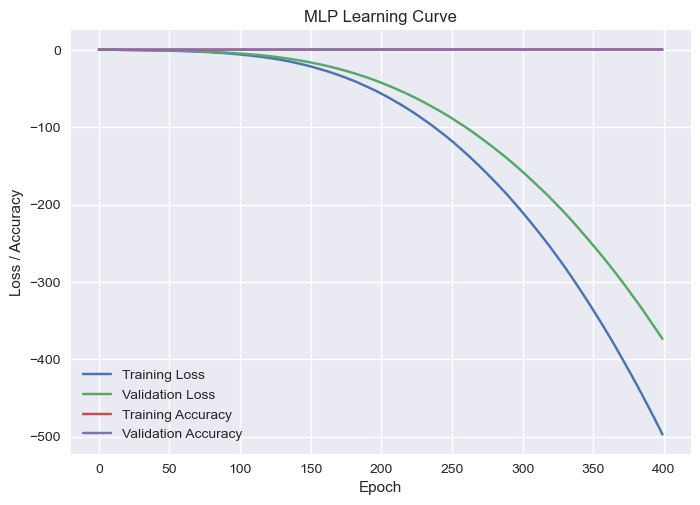

In [86]:

# Plot training history
plt.plot(mlp_model_train.history['loss'], label='Training Loss')
plt.plot(mlp_model_train.history['val_loss'], label='Validation Loss')
plt.plot(mlp_model_train.history['accuracy'], label='Training Accuracy')
plt.plot(mlp_model_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.title('MLP Learning Curve')
plt.legend()
plt.show()


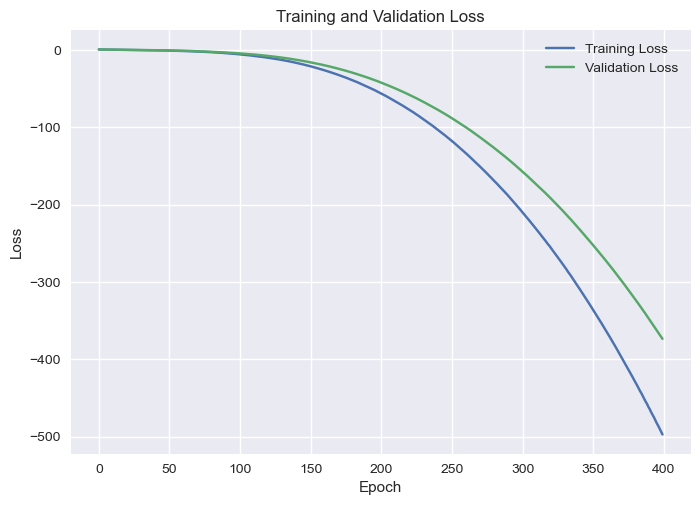

In [87]:

# Plot the training and validation loss over epochs
plt.plot(mlp_model_train.history['loss'], label='Training Loss')
plt.plot(mlp_model_train.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [90]:
mlp_probabilities = mlp_model.predict(X_tests)

# Make predictions on the test set
mlp_predict = (mlp_probabilities > 0.5).astype('int32')

# Calculate accuracy
mlp_accuracy = accuracy_score(y_tests, mlp_predict)
print("MLP Accuracy:", mlp_accuracy)

# Print classification report for MLP
print("MLP Classification Report:")
print(classification_report(y_tests, mlp_predict, zero_division=1))

# Calculate confusion matrix
mlp_conf_matrix = confusion_matrix(y_tests, mlp_predict)
print("Confusion matrix:", mlp_conf_matrix)

1/1 [==============================] - 0s 17ms/step
MLP Accuracy: 0.5
MLP Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.32      1.00      0.48         7
           2       1.00      0.00      0.00        14

    accuracy                           0.50        30
   macro avg       0.77      0.63      0.47        30
weighted avg       0.84      0.50      0.39        30

Confusion matrix: [[ 8  1  0]
 [ 0  7  0]
 [ 0 14  0]]


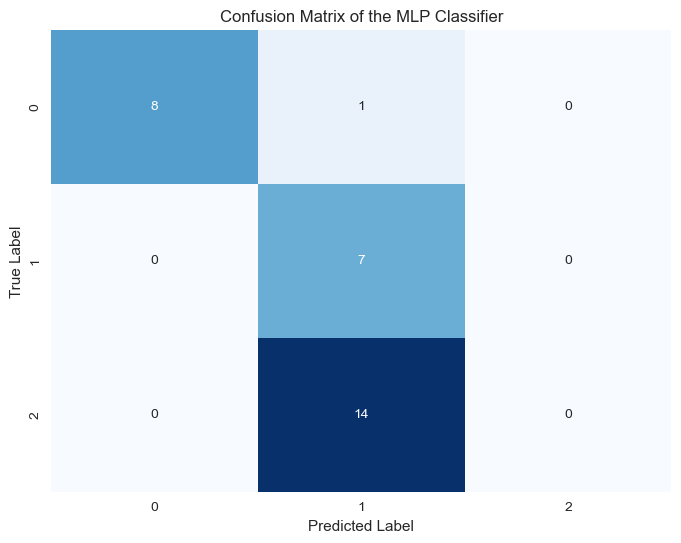

In [92]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of the MLP Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## K-Nearest Neighbour(KNN) Model

In [93]:
# Initialize the KNN classifier with k=10
knn_model = KNeighborsClassifier(n_neighbors=10)

# Train the KNN model on the selected features
knn_model.fit(X_trains, y_trains)

# Prediction on the test set
knn_predict = knn_model.predict(X_tests)

# Calculate accuracy
knn_accuracy = accuracy_score(y_tests, knn_predict)
print("KNN Accuracy:", knn_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_tests, knn_predict))

knn_conf_matrix = confusion_matrix(y_tests, knn_predict)
print("Confusion matrix:", knn_conf_matrix)

# Perform cross-validation with 5 folds
knn_cv_scores = cross_val_score(knn_model, X, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", knn_cv_scores)

# Calculate mean and standard deviation of cross-validation scores
print("Mean CV Score:", knn_cv_scores.mean())
print("Standard Deviation of CV Scores:", knn_cv_scores.std())


KNN Accuracy: 0.9333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       1.00      1.00      1.00         7
           2       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30

Confusion matrix: [[ 8  0  1]
 [ 0  7  0]
 [ 1  0 13]]
Cross-Validation Scores: [0.93333333 0.93333333 0.9        0.96666667 1.        ]
Mean CV Score: 0.9466666666666667
Standard Deviation of CV Scores: 0.03399346342395189


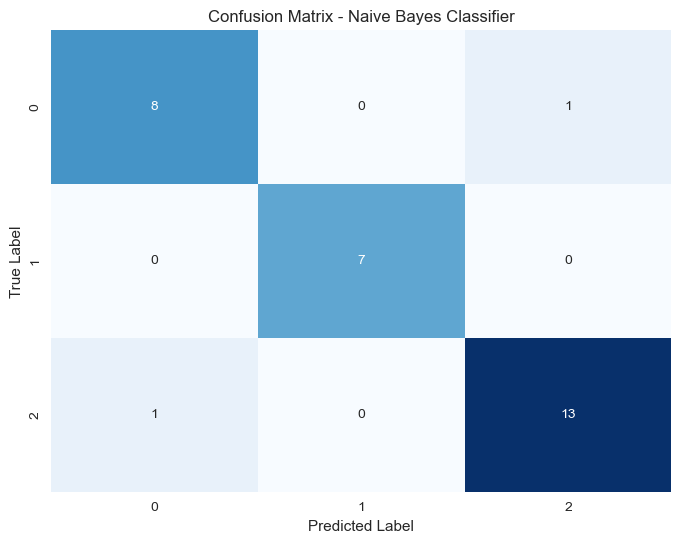

In [94]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Decision Tree (DT) Model

Decision Tree Accuracy: 0.9666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      1.00      1.00         7
           2       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion matrix: [[ 9  0  0]
 [ 0  7  0]
 [ 1  0 13]]


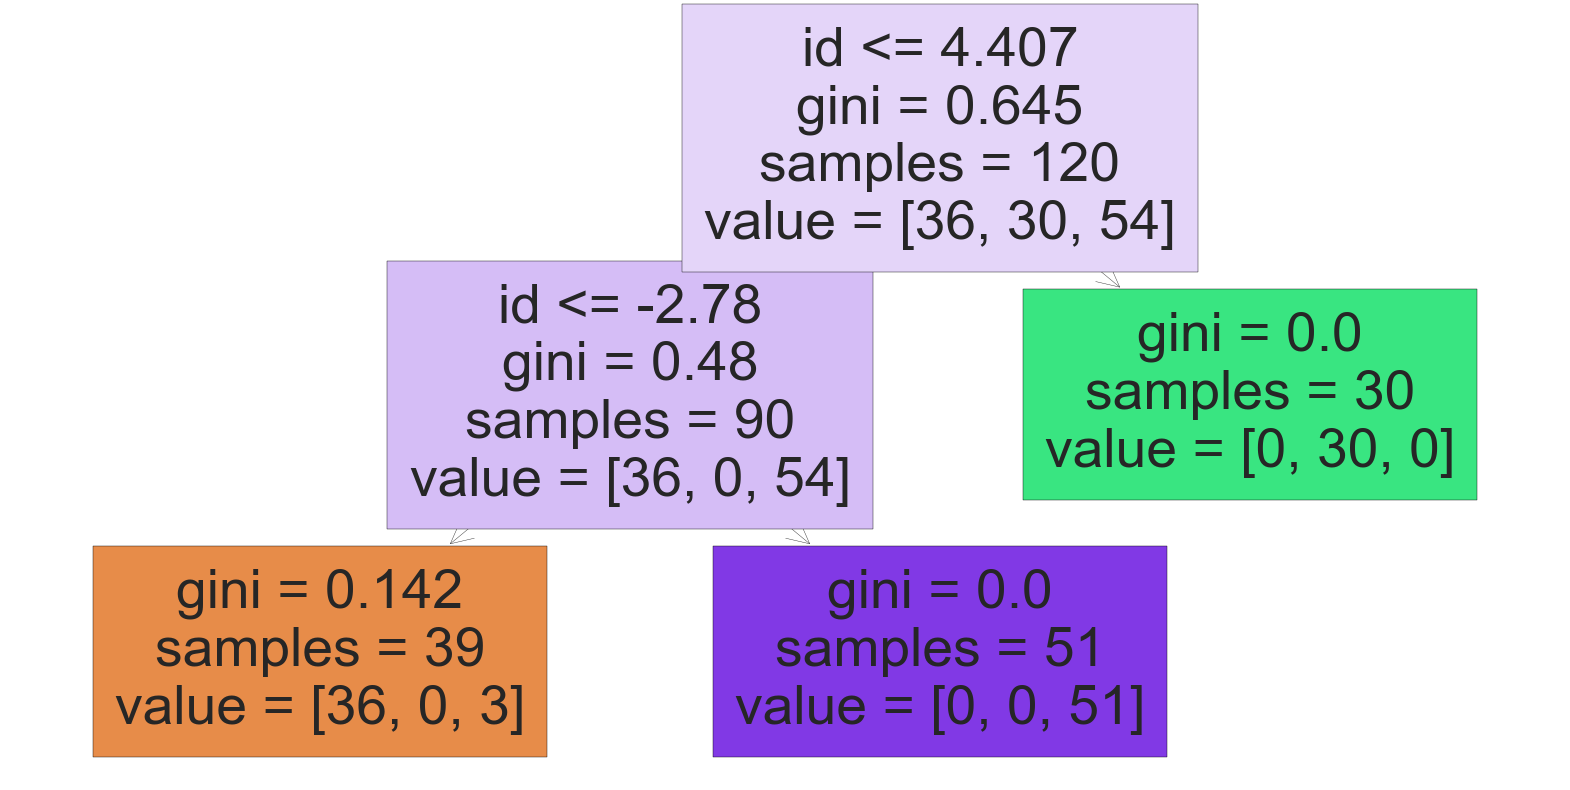

Cross-Validation Scores: [0.96666667 1.         0.96666667 1.         1.        ]
Mean CV Score: 0.9866666666666667
Standard Deviation of CV Scores: 0.01632993161855452


In [95]:
# Initialize the Decision Tree classifier including hyperparameter tuning
dt_model = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the Decision Tree model on the selected features
dt_model.fit(X_trains, y_trains)

# Prediction on the test set
dt_predict = dt_model.predict(X_tests)

# Calculate accuracy
dt_accuracy = accuracy_score(y_tests, dt_predict)
print("Decision Tree Accuracy:", dt_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_tests, dt_predict))

# Calculate confusion matrix
dt_conf_matrix = confusion_matrix(y_tests, dt_predict)
print("Confusion matrix:", dt_conf_matrix)


# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns)
plt.show()


# Perform cross-validation with 5 folds
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", dt_cv_scores)

# Calculate mean and standard deviation of cross-validation scores
print("Mean CV Score:", dt_cv_scores.mean())
print("Standard Deviation of CV Scores:", dt_cv_scores.std())


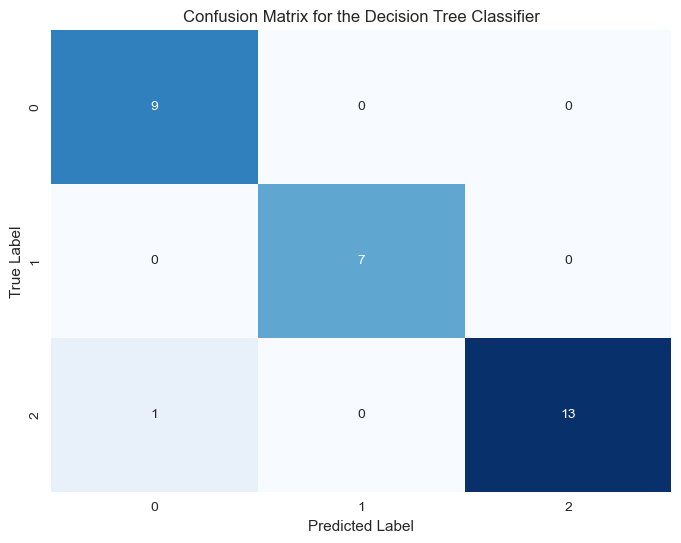

In [96]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for the Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Classifiers Ensemble
Ensemble stacking of the three classifier models using logistic regression as the predicting model on these base models

In [97]:
mlp_predict = mlp_predict.reshape(-1)  # to make mlp have the same shape as the remaining models 

combined_result = [mlp_predict, knn_predict, dt_predict]


combined_result = np.array(combined_result).T  # Transpose to make each base model's predictions a feature

# initializing the model
meta_model = LogisticRegression()
# fit the model 
meta_model.fit(combined_result, y_tests)


LogisticRegression()

In [98]:
# Check the shape of features
print("Shape of combined_result:", combined_result.shape)

# Print the content of features
print("Content of combined_results:")
print(combined_result)

Shape of combined_result: (30, 3)
Content of combined_results:
[[1 2 2]
 [1 1 1]
 [1 2 2]
 [0 0 0]
 [1 0 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 2 2]
 [1 2 2]
 [0 0 0]
 [1 2 0]
 [0 0 0]
 [1 1 1]
 [1 2 2]
 [0 0 0]
 [1 2 2]
 [0 0 0]
 [1 2 2]
 [0 0 0]
 [1 1 1]
 [1 2 2]
 [0 0 0]
 [0 0 0]
 [1 2 2]
 [1 2 2]
 [1 2 2]
 [1 2 2]
 [1 2 2]
 [1 1 1]]


In [99]:
# Predict with the meta-model
combined_predictions = meta_model.predict(combined_result)

# Print the predictions of the meta-model
print("Meta-model predictions:", combined_predictions)


Meta-model predictions: [2 1 2 0 1 1 1 1 2 2 0 0 0 1 2 0 2 0 2 0 1 2 0 0 2 2 2 2 2 1]


In [101]:
combined_accuracy = accuracy_score(y_tests, combined_predictions)
combined_precision = precision_score(y_tests, combined_predictions, average='weighted')
combined_recall = recall_score(y_tests, combined_predictions, average='weighted')
combined_f1 = f1_score(y_tests, combined_predictions, average='weighted')
combined_conf_matrix = confusion_matrix(y_tests, combined_predictions)


# Print evaluation metrics
print("Combined Model Accuracy:", combined_accuracy)
print("Combined Model Precision:", combined_precision)
print("Combined Model Recall:", combined_recall)
print("Combined Model F1-score:", combined_f1)

# Print the confusion matrix
print("Combined Model Confusion Matrix:")
print(combined_conf_matrix)


Combined Model Accuracy: 0.9666666666666667
 Combined Model Precision: 0.9708333333333333
Combined Model Recall: 0.9666666666666667
Combined Model F1-score: 0.9671604938271605
Combined Model Confusion Matrix:
[[ 9  0  0]
 [ 0  7  0]
 [ 0  1 13]]


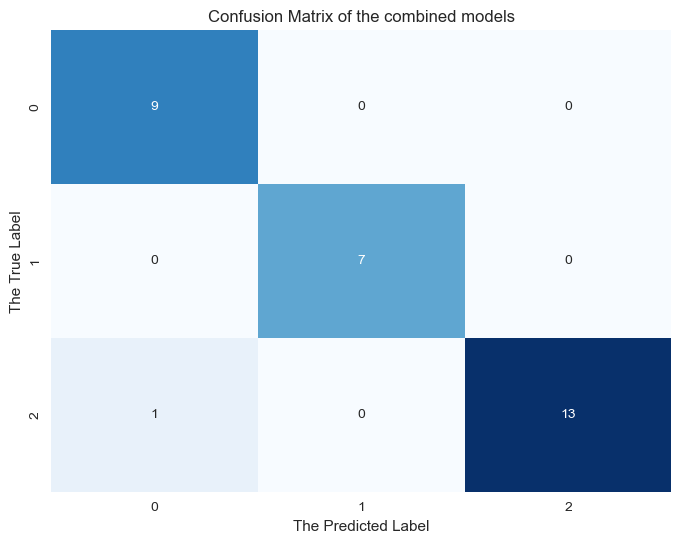

In [102]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix of the combined models')
plt.xlabel('The Predicted Label')
plt.ylabel('The True Label')
plt.show()


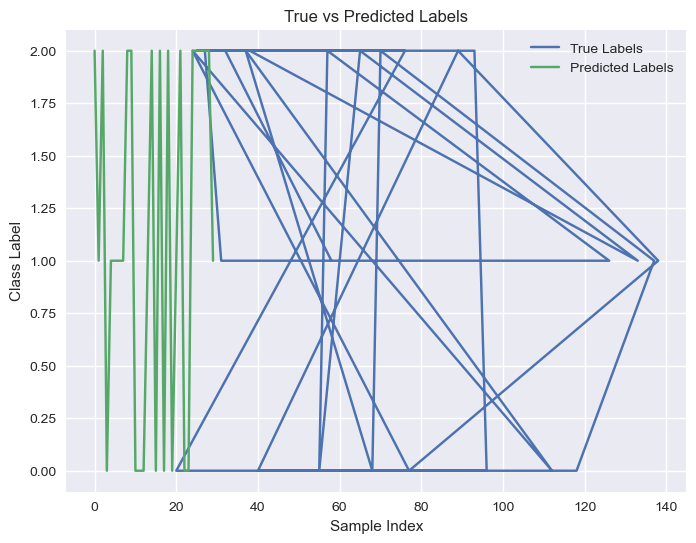

In [103]:
plt.figure(figsize=(8, 6))
plt.plot(y_tests, label='True Labels')
plt.plot(combined_predictions, label='Predicted Labels')
plt.title('True vs Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.legend()
plt.show()


##  Combined Model Feature importance
to know how well each models performed on the combined model and which feature impacted the model the most

In [104]:
# to get the important feature from the meta-model
feature_importance = meta_model.coef_[0]

# Pair the feature names with their corresponding importance scores
feature_importance_dict = dict(zip(X.columns, feature_importance))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the important features
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")
    
# output indicates age, id and gender are the most important feature accross the three models    


Feature: age, Importance: -0.24271004088713105
Feature: id, Importance: -1.0979218939813489
Feature: gender, Importance: -1.3147532040901773


In [106]:
# Individual Model Feature importance
meta_coefficients = meta_model.coef_[0]

# Get the absolute values of coefficients for easier interpretation
abs_meta_coefficients = np.abs(meta_coefficients)

# Get the indices of features sorted by importance
sorted_feature_indices = np.argsort(abs_meta_coefficients)[::-1]

# Get the feature names (base model predictions)
feature_names = ['MLP', 'KNN', 'Decision Tree']  # You can adjust these names based on your base models

# Print the importance of each feature
print("Feature Importance:")
for idx in sorted_feature_indices:
    print(f"{feature_names[idx]}: {meta_coefficients[idx]}")


Feature Importance:
Decision Tree: -1.3147532040901773
MLP: -1.0979218939813489
KNN: -0.24271004088713105


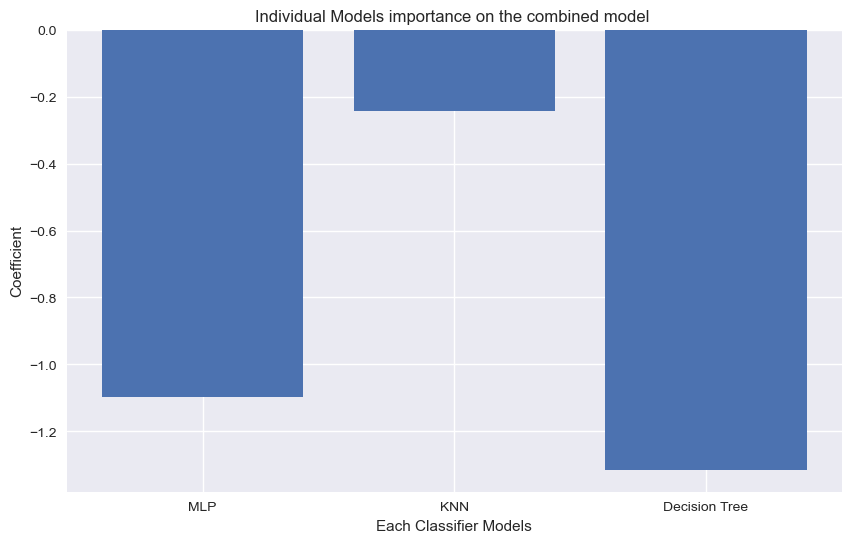

In [107]:

# Plot the coefficiaents
plt.figure(figsize=(10, 6))
plt.bar(feature_names, meta_coefficients)
plt.xlabel('Each Classifier Models')
plt.ylabel('Coefficient')
plt.title('Individual Models importance on the combined model ')
plt.show()


In [108]:
# To save model

import pickle

# Save the meta_model
with open('meta_model.Combined', 'wb') as f:
    pickle.dump(meta_model, f)


# Comments on the models performance

Individual models were trained and evaluated separately, yet their combination yielded improved performance, exhibiting higher accuracy, true positive, and true negative values. Notably, the MLP model, despite having lower accuracy, contributed significantly to the combined model's performance, outperforming the KNN model, which had higher accuracy.